In [1]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS1IDs import *
from NumpyMSPeaksIdentification import *
from PeaksIdent import *
from PeaksFindDif import *
from ShowDF import *
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from JoiningSpectra import *
from SamplingSpectra import *
from SpectralList import *
from featDet import *

In [2]:
DataSetName='12111.mzML'

In [3]:
DataSet=ChargeDataSet(DataSetName)

In [4]:
MS1IDVec=MS1IDs(DataSet)

In [5]:
SpectraList=SpectralList(DataSet,MS1IDVec,RTslice=10)

In [25]:
SpectraPeaks=featDet(SpectraList,ZeroInt=1e3,min_mz=200,max_mz=300,minQuality=1,minSignals=30,stdDistance=4)

In [58]:
SpectraPeaks=SpectraPeaks[(SpectraPeaks[:, 0]).argsort(),:] 
ShowDF(pd.DataFrame(SpectraPeaks))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,200.164,0.00111309,31,0.000549768,2.74659,-40,0,1,780527,0,0.000687408,60395.7,200.162,200.166,200.161,200.168
1,200.184,0.00125307,1674,7.89786e-05,0.39453,0,0,0,2.41977e+07,0,0.00078002,77650.3,200.18,200.187,200.18,200.187
2,200.201,0.00129215,2428,6.76e-05,0.337661,0,0,0,5.65827e+07,0,0.000777557,95742.2,200.197,200.205,200.197,200.205
3,200.237,0.00128124,2110,7.19115e-05,0.359131,0,0,0,4.58807e+07,0,0.000758267,140163,200.233,200.241,200.233,200.241
4,200.947,0.00127836,1656,8.10104e-05,0.403143,0,0,0,2.82486e+07,0,0.000810829,104106,200.943,200.951,200.943,200.951
5,200.983,0.00125971,505,0.00014494,0.721154,0,0,0,9.00703e+06,0,0.853413,397973,200.98,200.987,200.98,200.987
6,201.024,0.00124579,1257,9.06473e-05,0.450929,0,0,0,1.27315e+07,0,0.000806394,49163.5,201.02,201.027,201.02,201.027
7,201.112,0.00130635,2285,7.04527e-05,0.350316,0,0,0,5.61138e+07,0,0.0219249,372320,201.108,201.116,201.108,201.116
8,203.059,0.00148297,78,0.000443493,2.18406,0,0,0,1.55531e+07,0,0.000983235,1.66131e+06,203.053,203.064,203.054,203.063
9,203.081,0.00138469,248,0.000228251,1.12394,0,0,0,2.12989e+07,0,0.0190281,541474,203.077,203.086,203.077,203.085


In [43]:
#SpectraPeaks[0, 16]=0

IndexError: index 16 is out of bounds for axis 1 with size 16

937 235.20548719014232


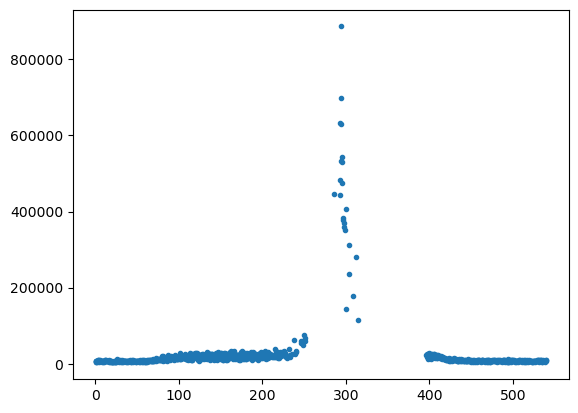

914 266.98196615590655


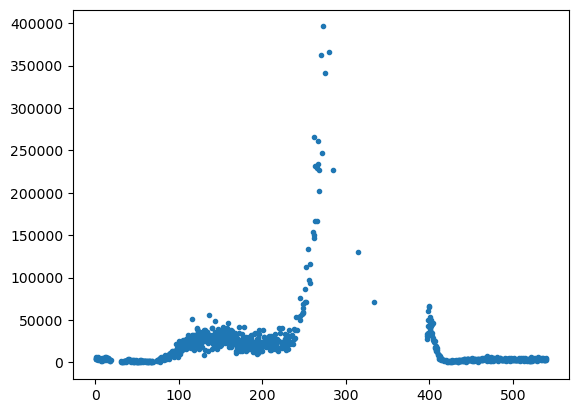

1032 235.16892990681848


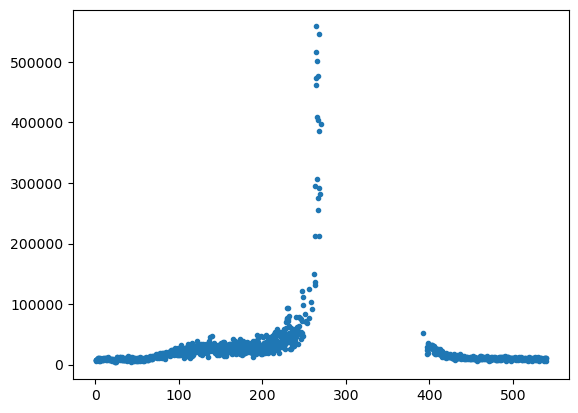

1040 282.2214673290016


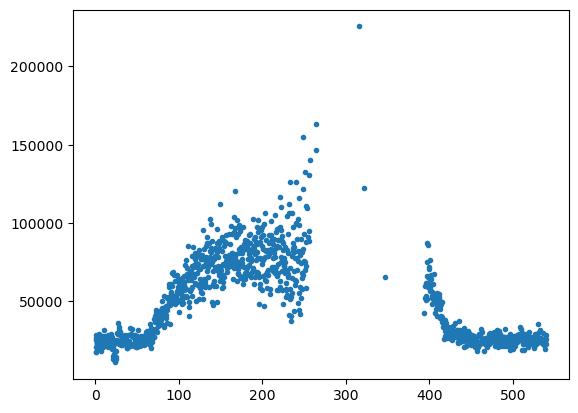

1048 280.2632943618545


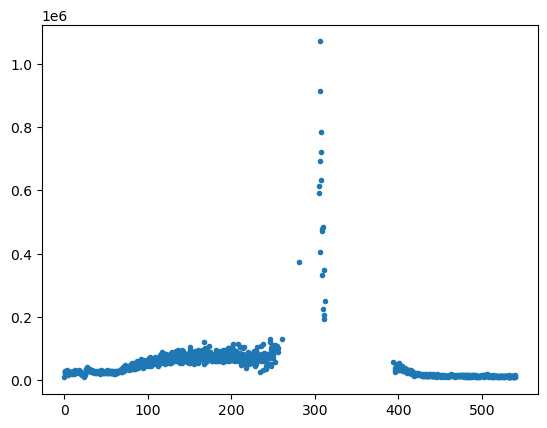

955 238.97932257328847


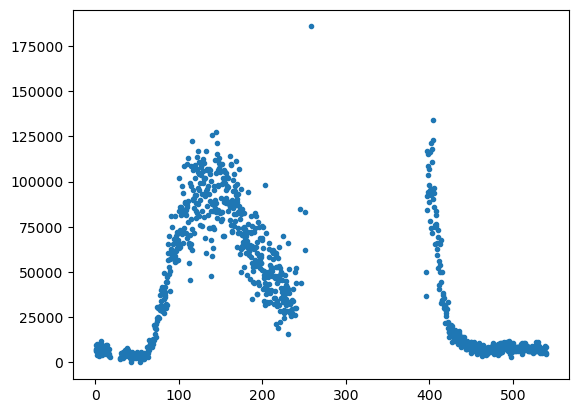

891 290.91427972574104


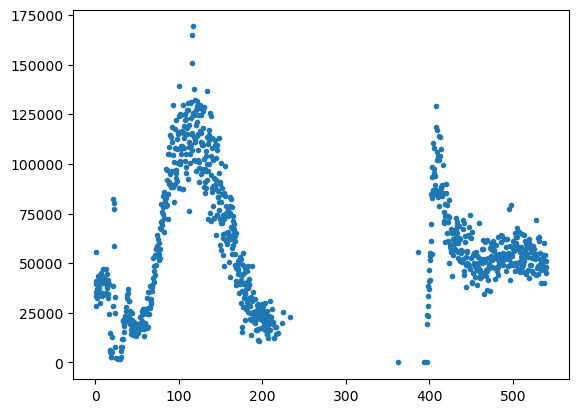

1032 228.23198532621382


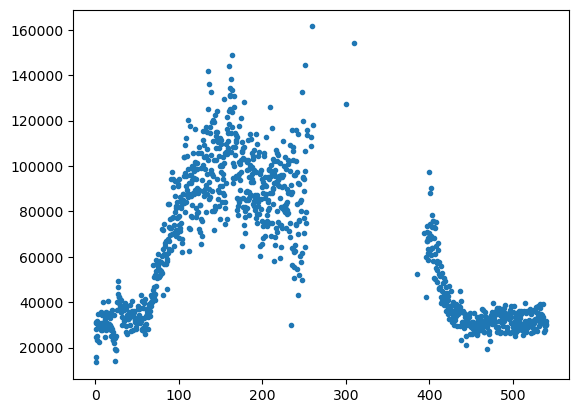

874 272.90369232193217


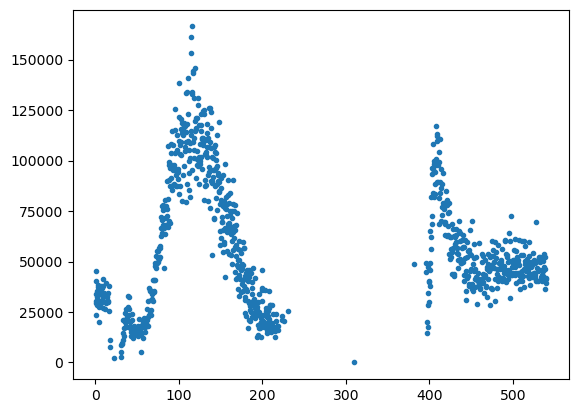

830 280.96126985102774


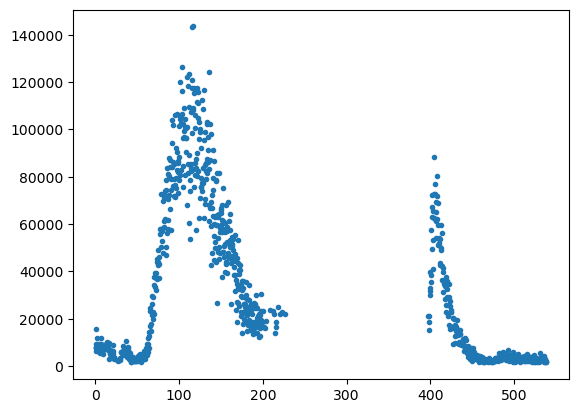

1033 223.0634726852344


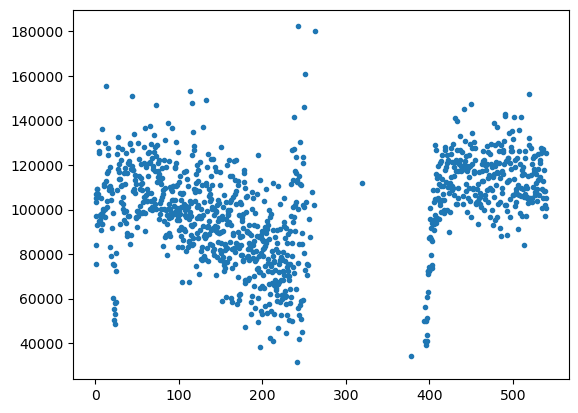

84 254.89914716754353


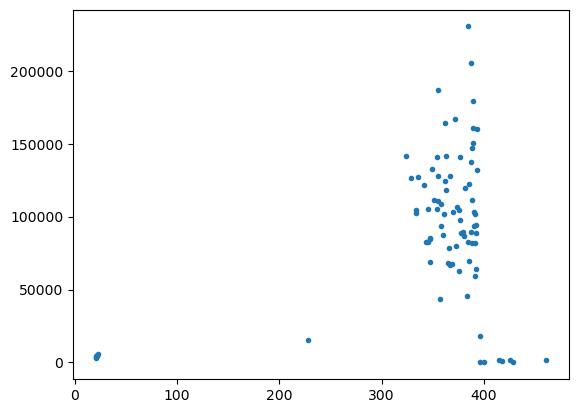

927 241.19785835482526


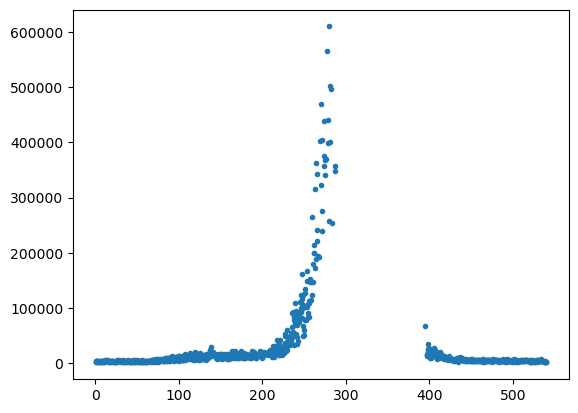

1023 239.12710628203635


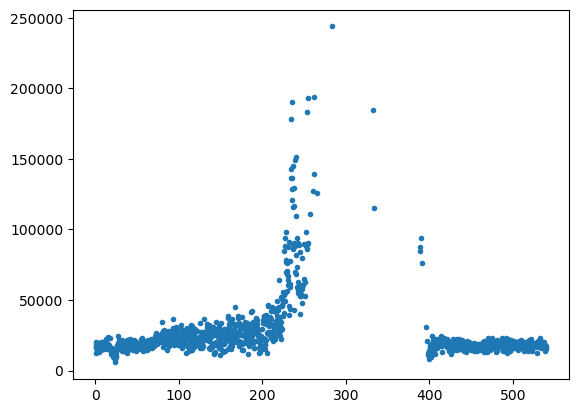

102 277.0713766949234


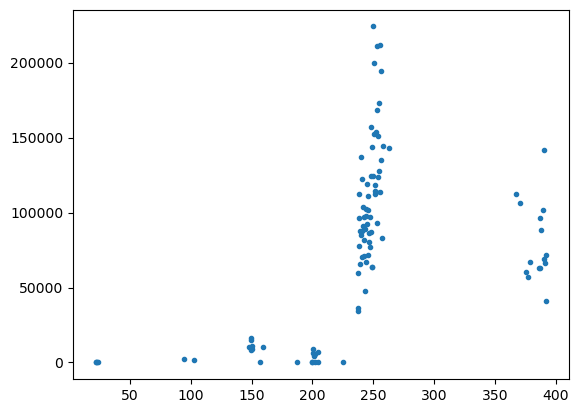

302 255.17738649385186


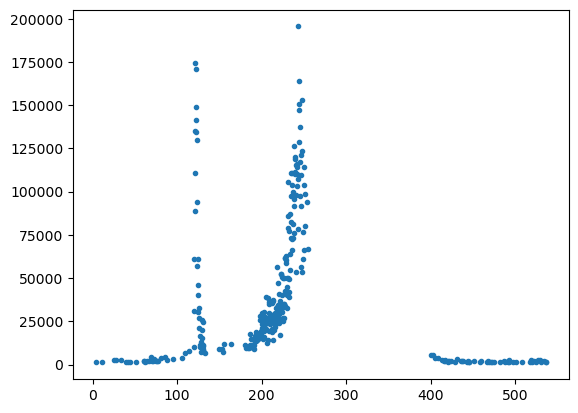

993 219.04725006841005


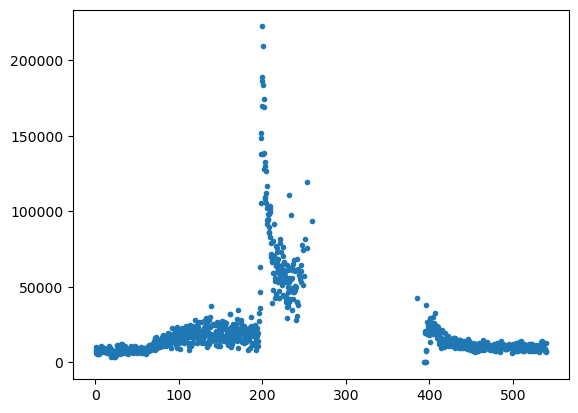

130 230.15368867655727


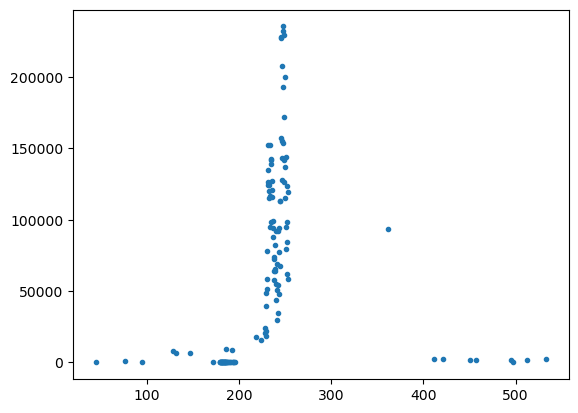

1061 299.06138359902906


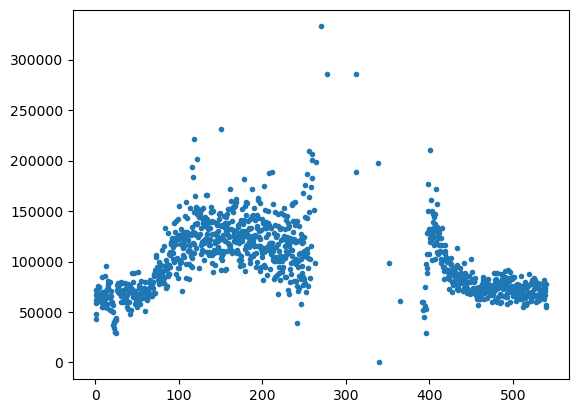

421 277.09575081133175


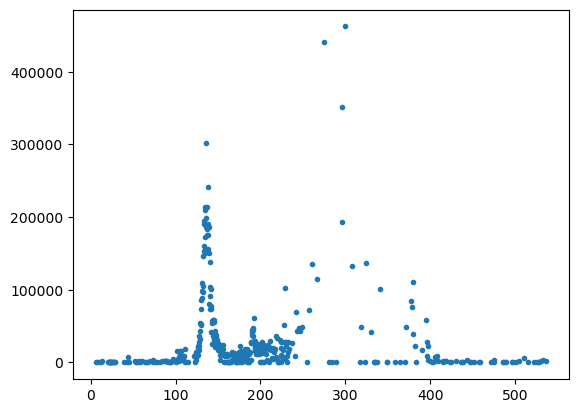

857 211.16899530758138


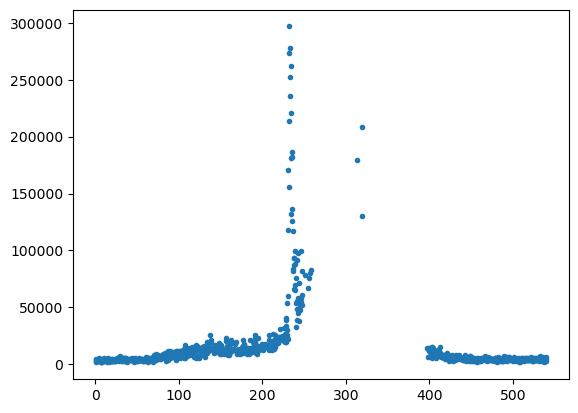

1057 219.17410422319753


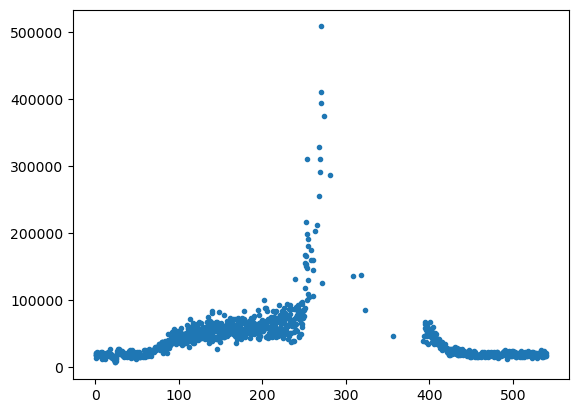

178 216.0871756742247


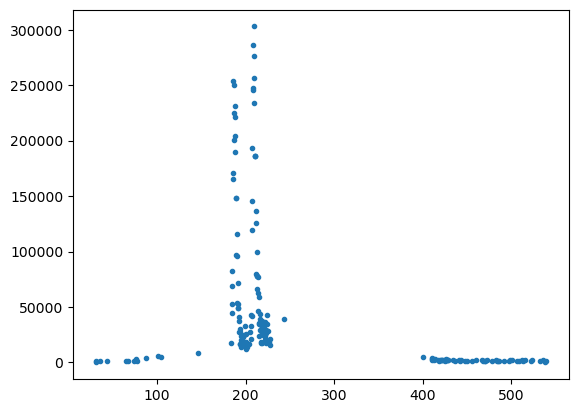

53 244.1692420289694


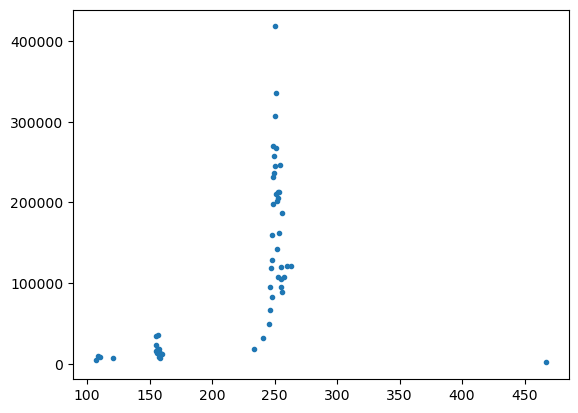

755 242.92897191887474


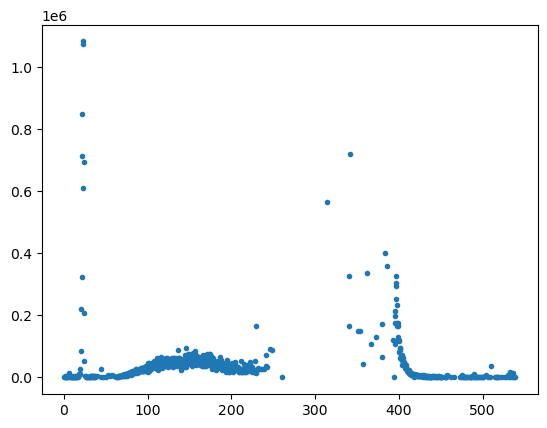

131 220.07887621865356


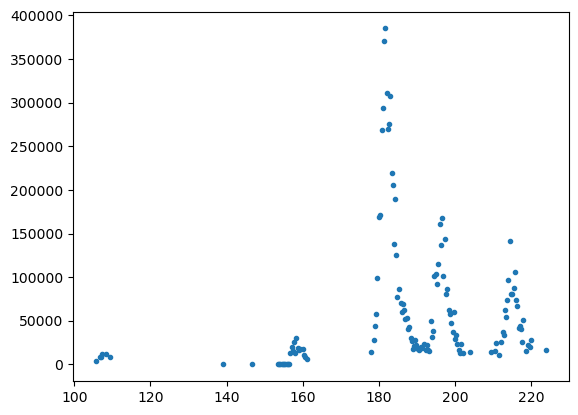

122 220.11574213787495


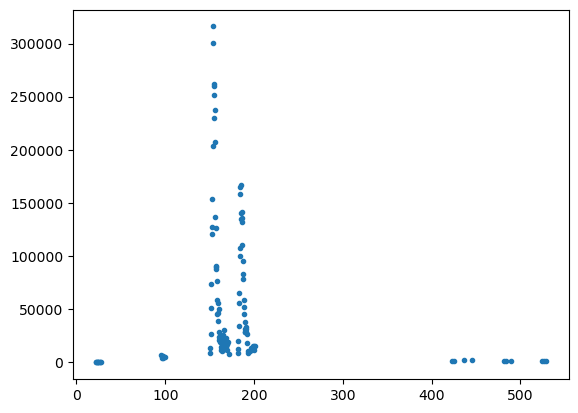

315 211.08404811232845


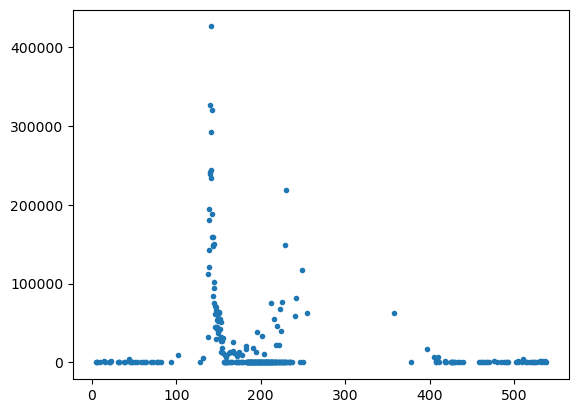

334 216.12886570843543


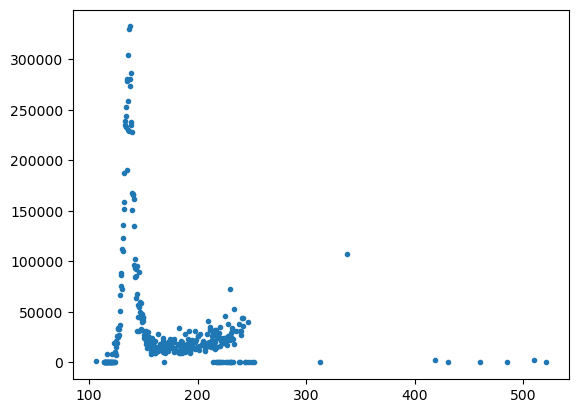

818 251.18520186961206


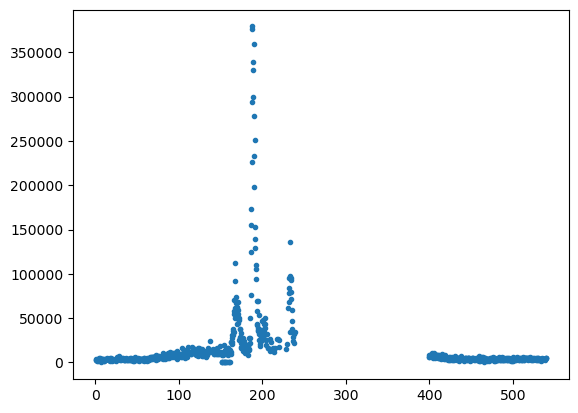

893 245.11427322932997


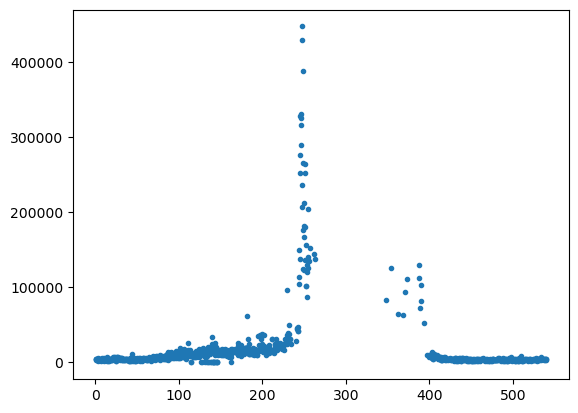

81 246.08153355467087


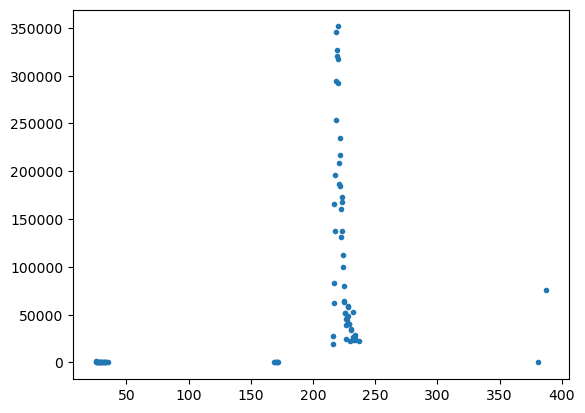

743 249.1457603723186


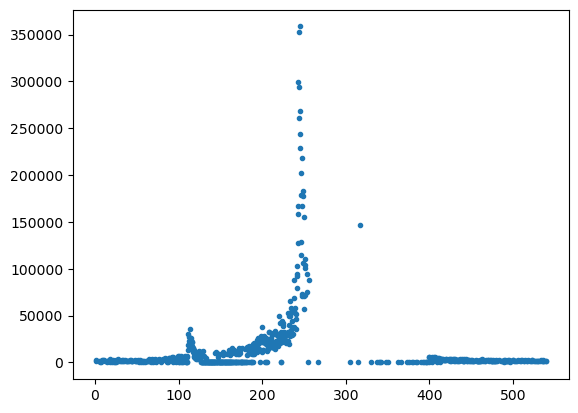

1038 209.15338592275745


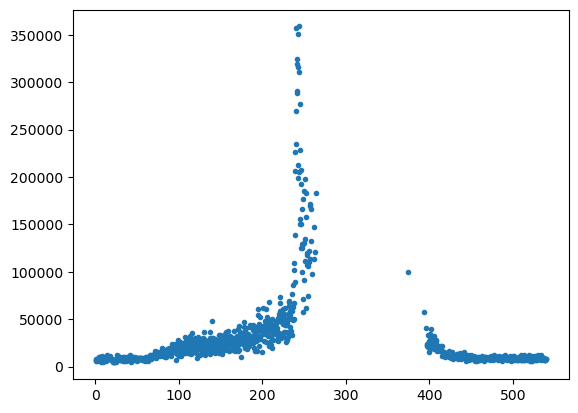

444 293.17382793520704


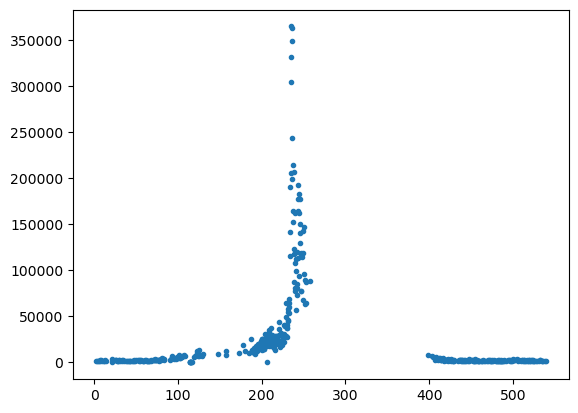

1006 201.1120019160838


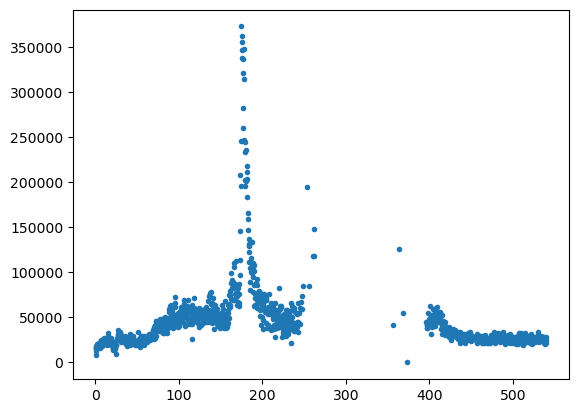

159 263.0676298990345


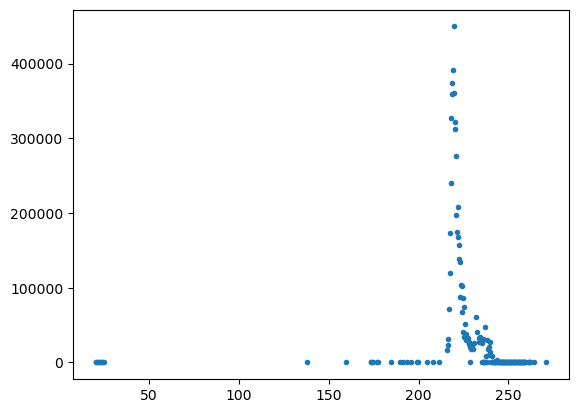

1009 259.15374819606126


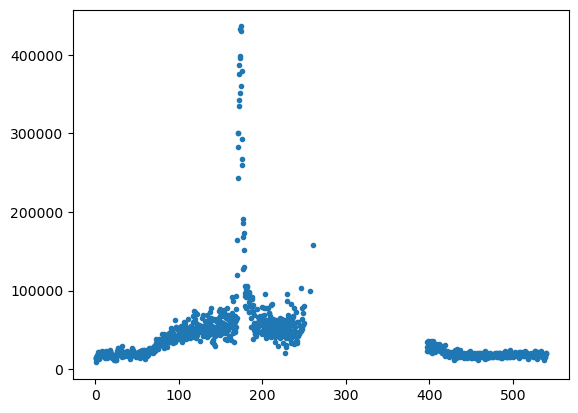

198 209.16488090481317


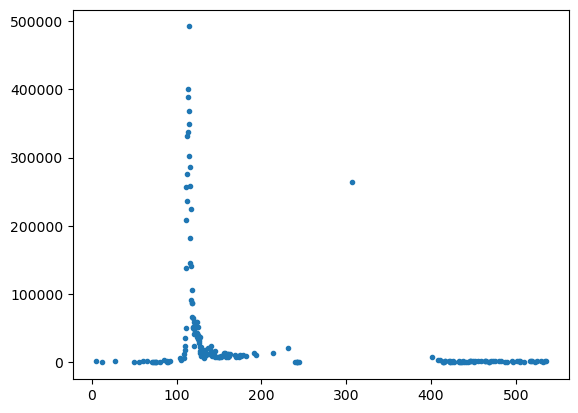

63 288.28940677968967


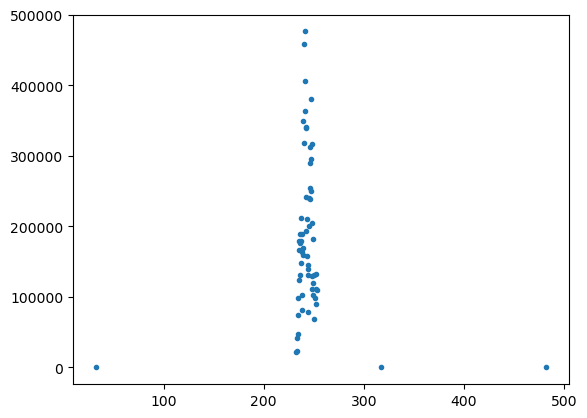

342 211.14386514790246


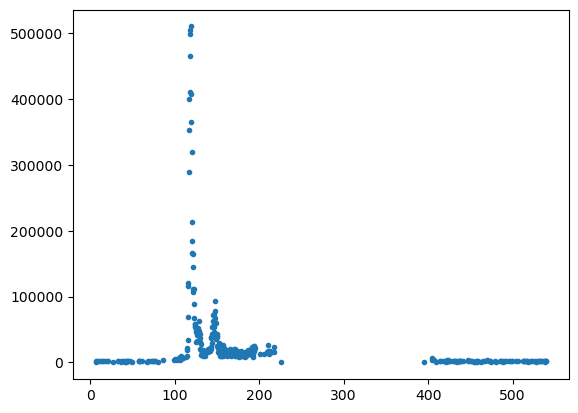

77 244.19011046474174


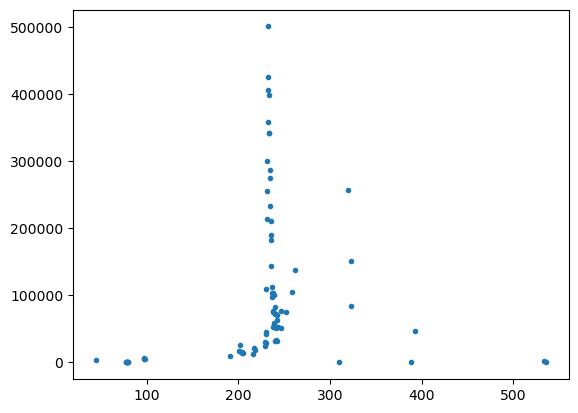

111 242.0712506342636


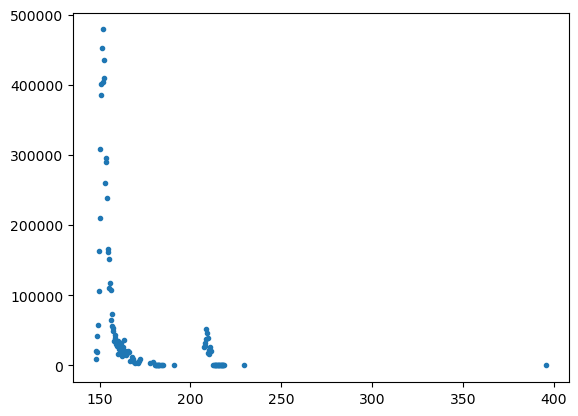

1019 227.12609705310118


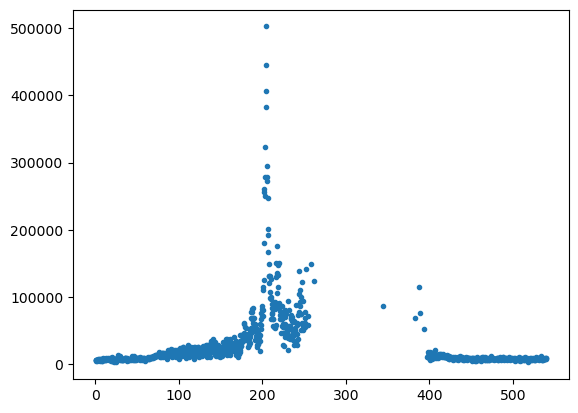

440 243.12026198460924


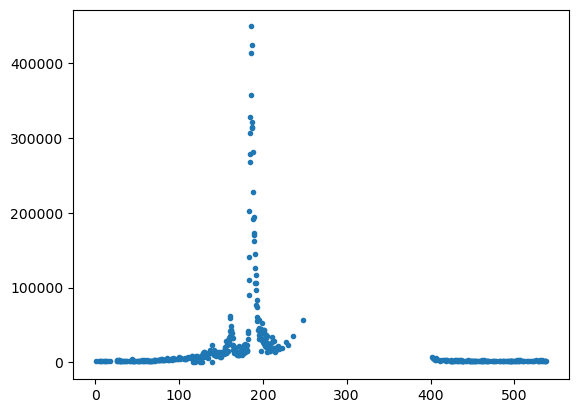

100 260.06098567457326


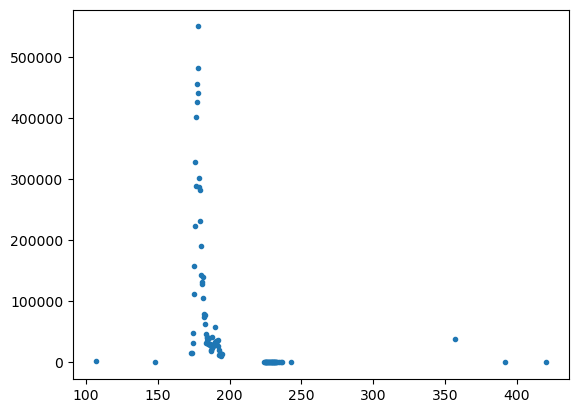

166 287.14639312155913


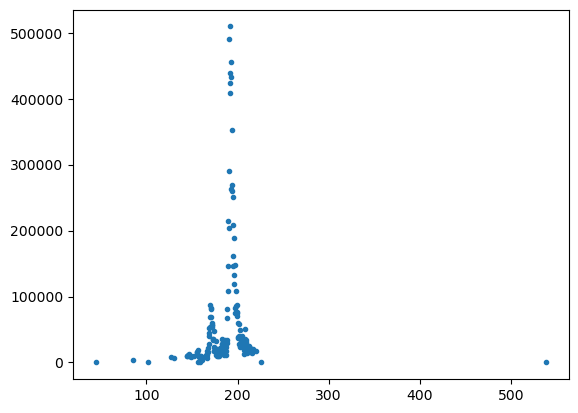

1035 206.95304188173563


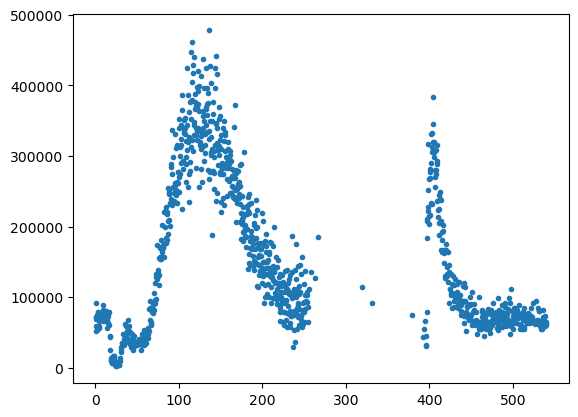

812 213.15943021551328


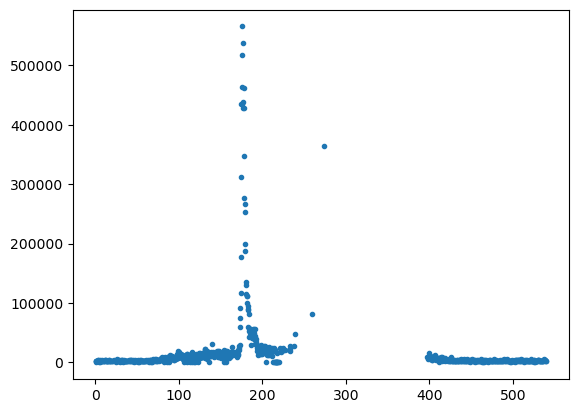

229 289.1410795634459


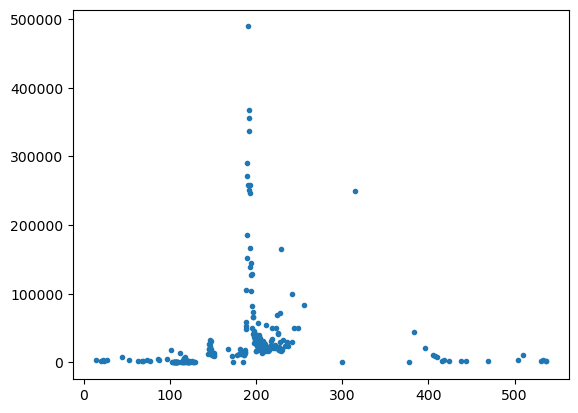

700 213.11187710879764


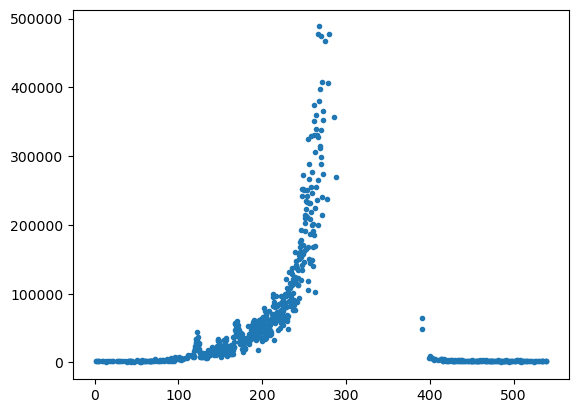

225 299.14632770696795


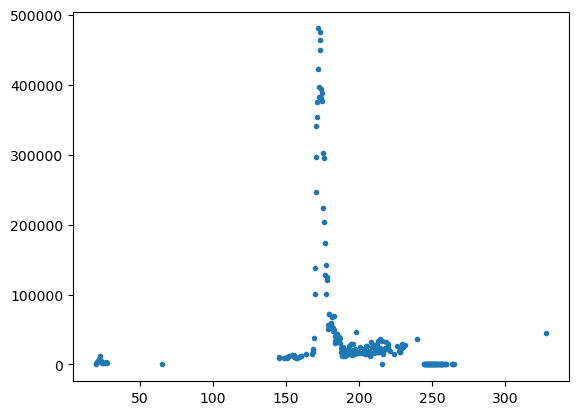

256 285.1306000779089


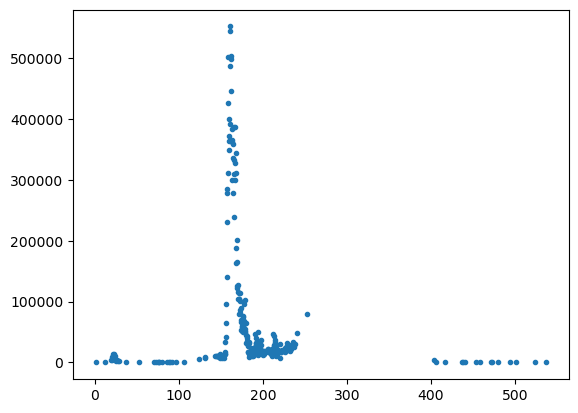

799 232.16937967718795


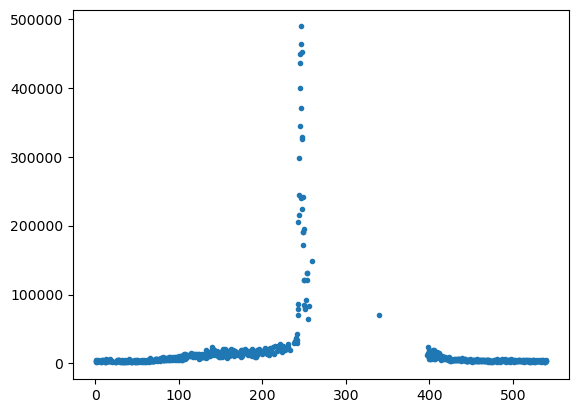

972 245.229297543587


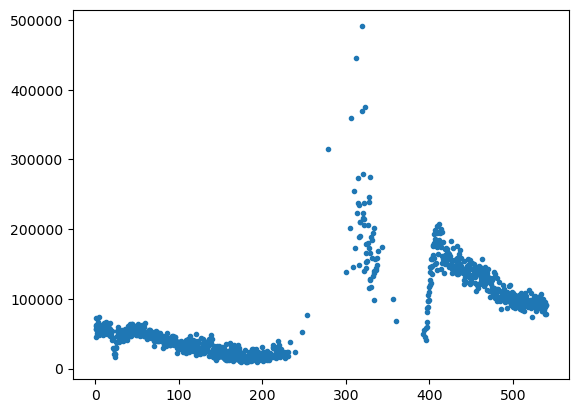

296 209.0595088378962


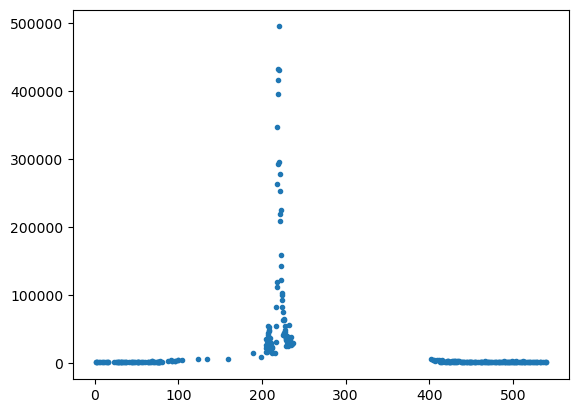

829 249.18294131542174


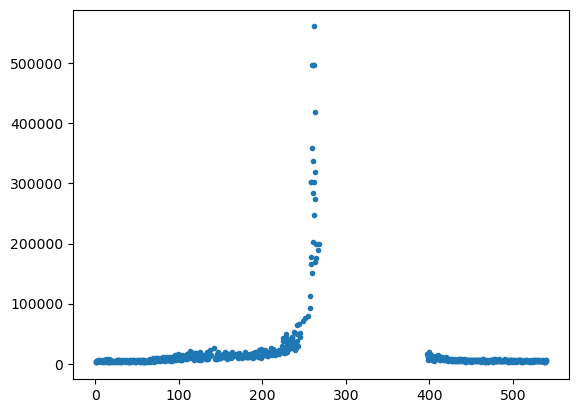

213 295.18983681259243


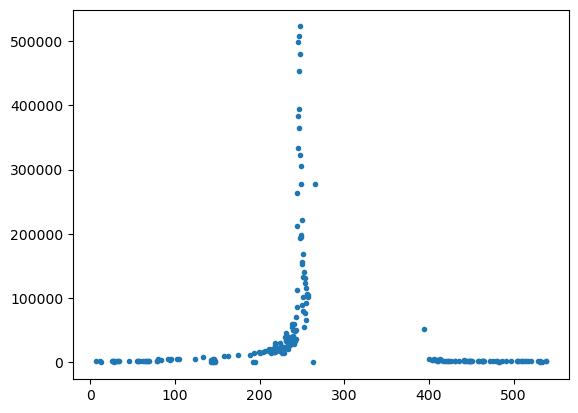

244 290.268633378901


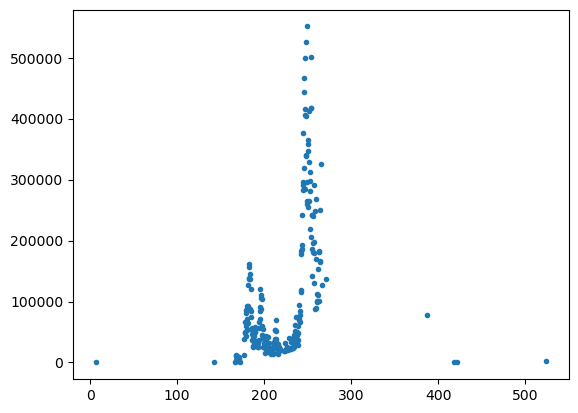

764 239.16194783163172


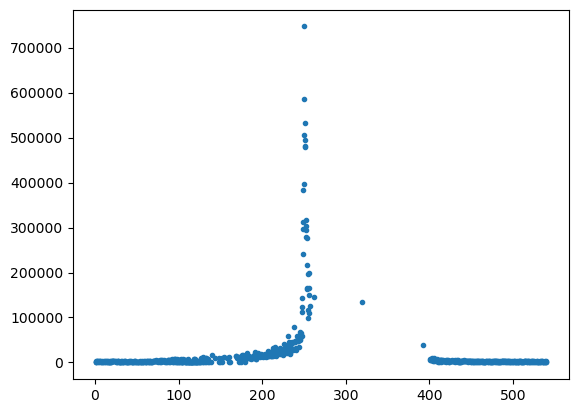

333 226.0836444756094


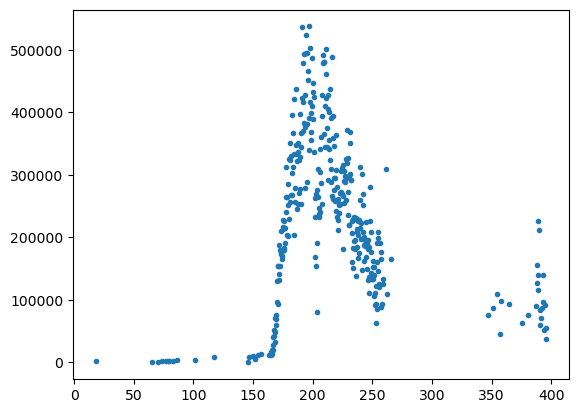

459 203.08132920078504


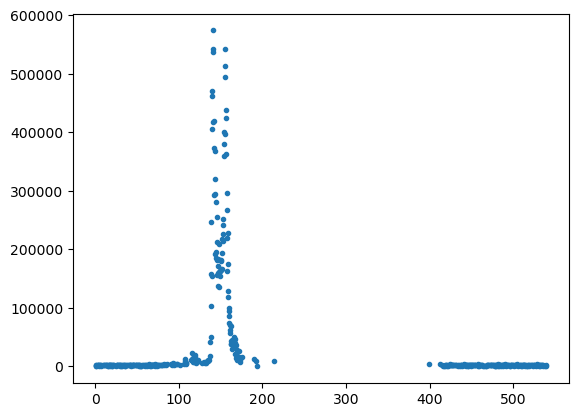

521 215.0927290864429


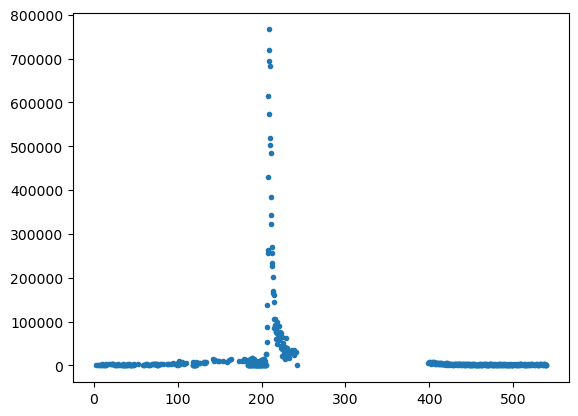

1157 259.244948461482


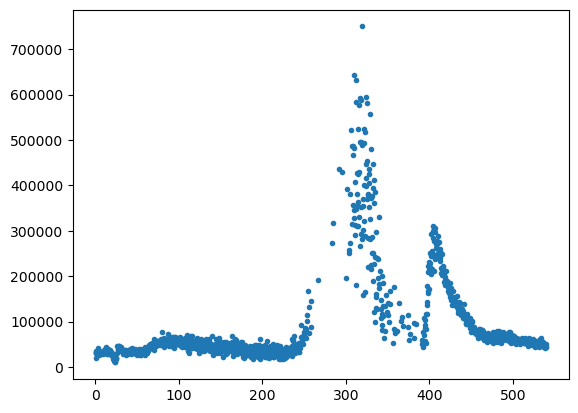

317 241.0965214827026


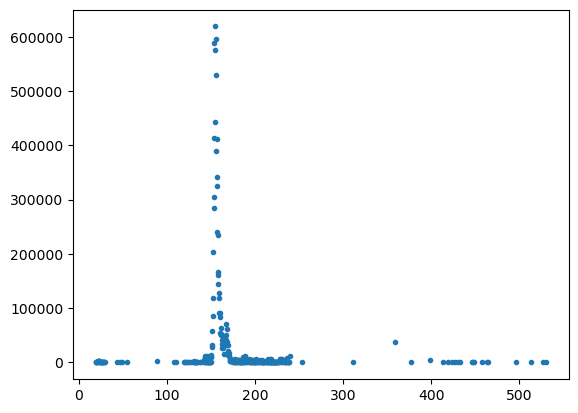

514 278.1829003275866


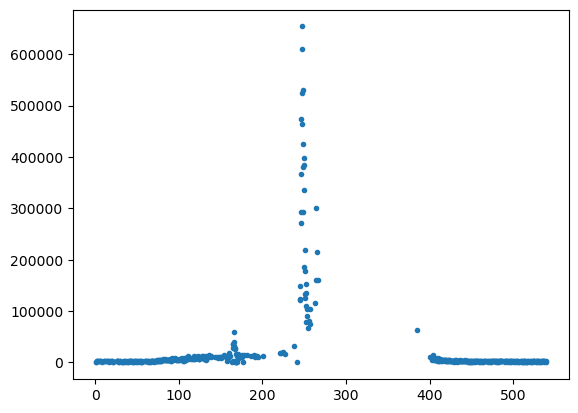

898 239.08877956326


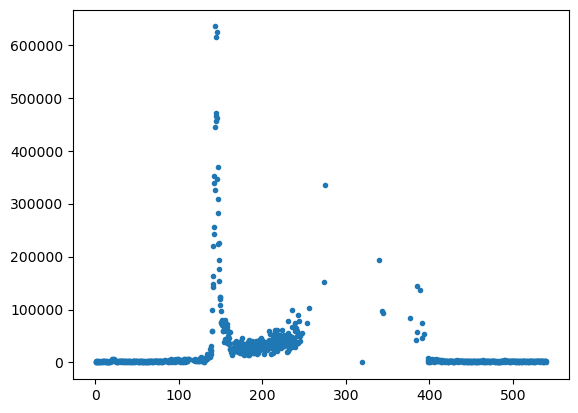

87 230.078822737291


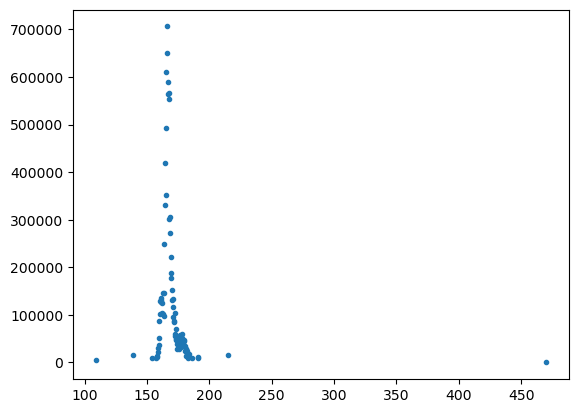

777 251.12011293667385


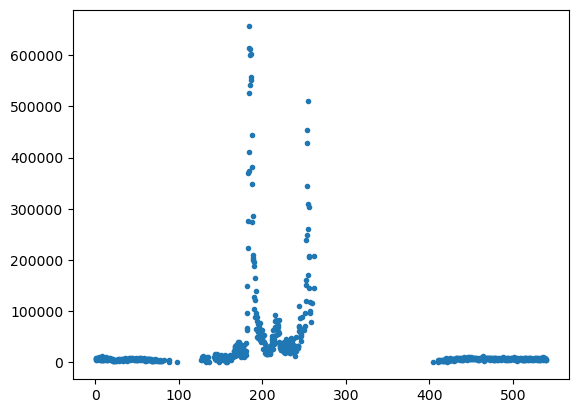

235 299.16108898534276


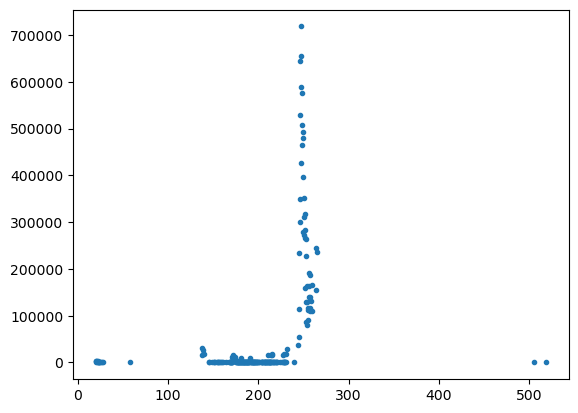

388 233.11112520397458


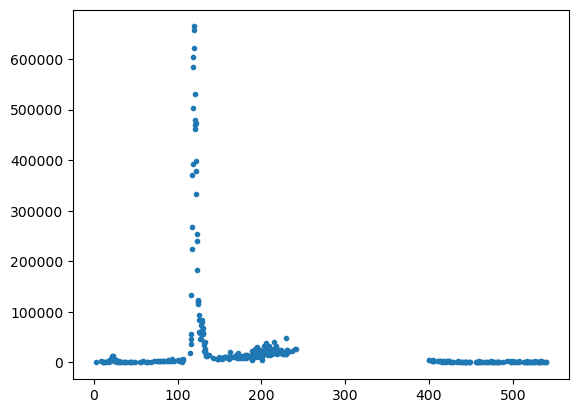

389 261.1307070342847


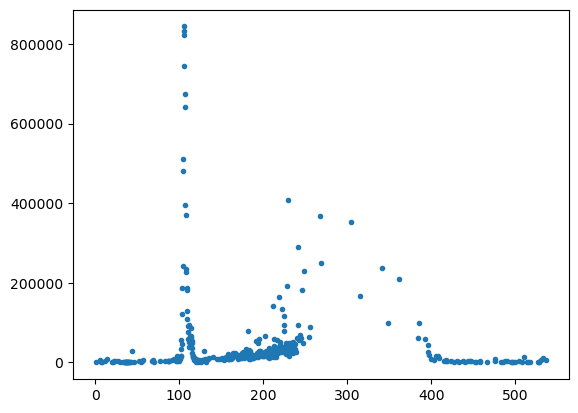

40 230.24753813305685


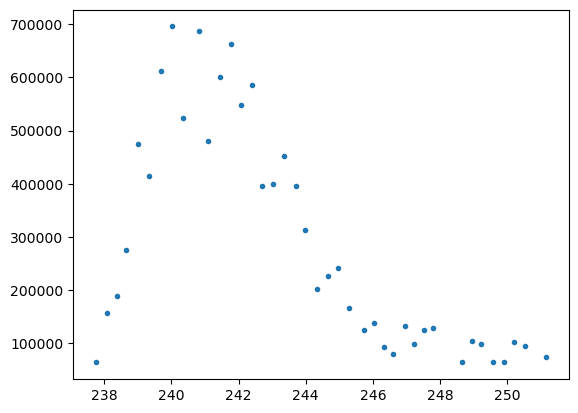

1036 245.138079229098


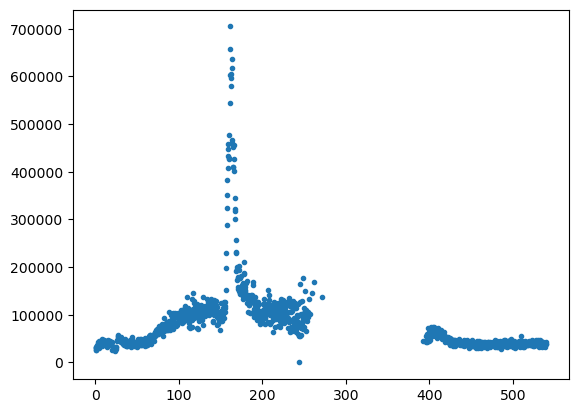

697 273.16703499078267


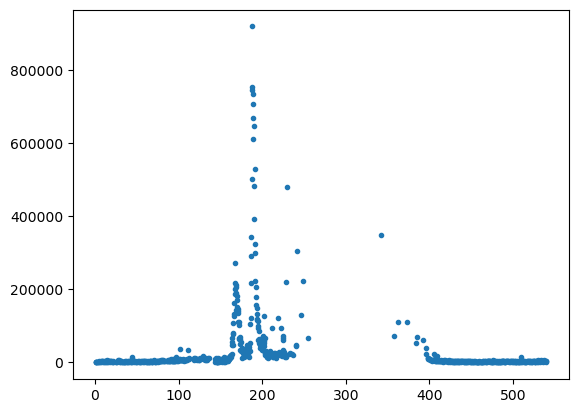

141 250.17755094805239


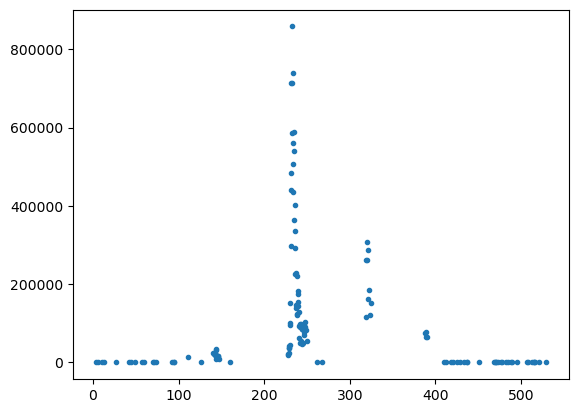

1056 256.2633326095085


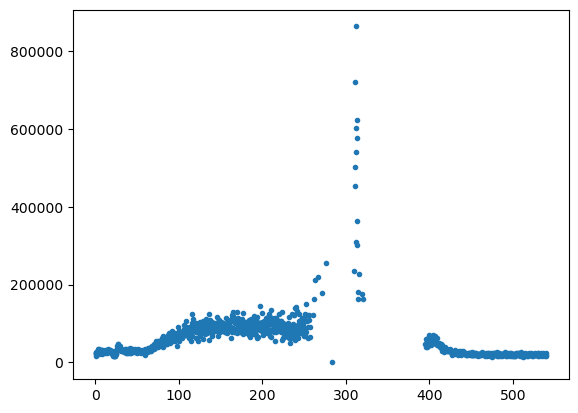

284 279.1337903816944


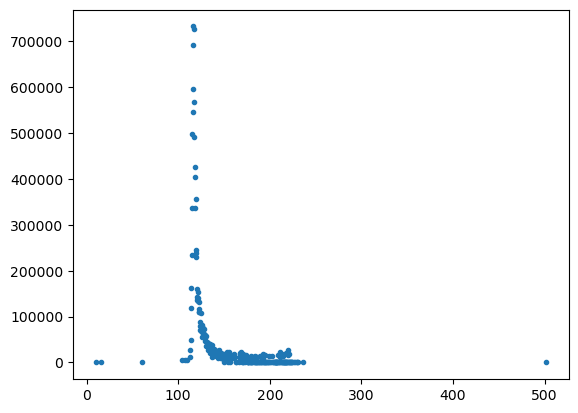

125 288.1128856509201


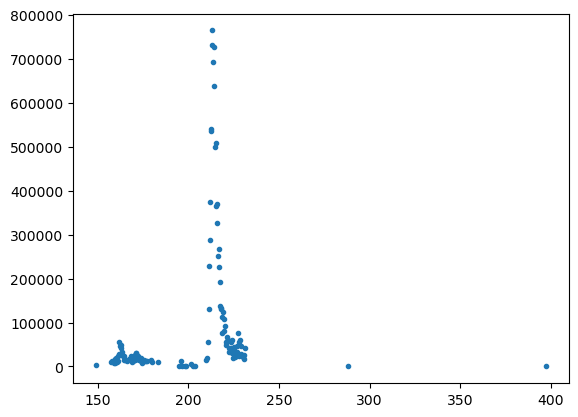

138 276.04102330346484


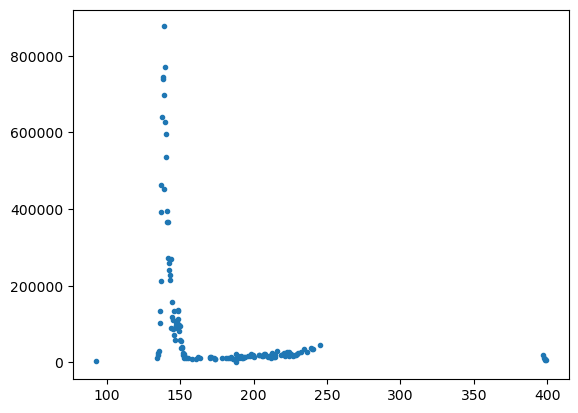

335 263.1289322095008


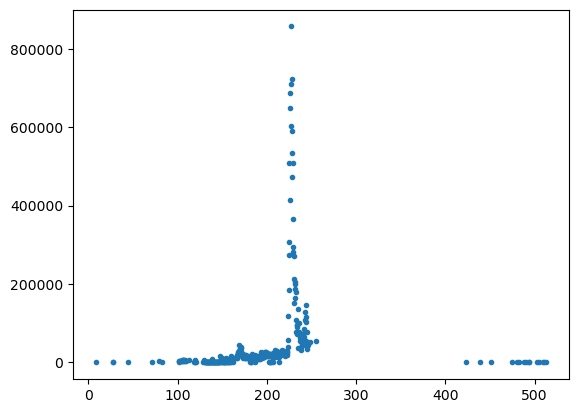

799 213.14612527111635


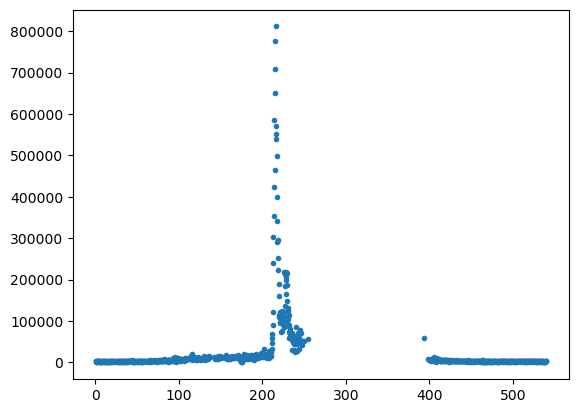

1045 224.96363262072728


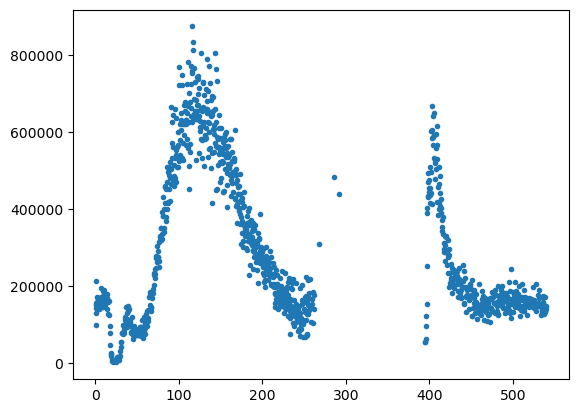

64 275.2772046961318


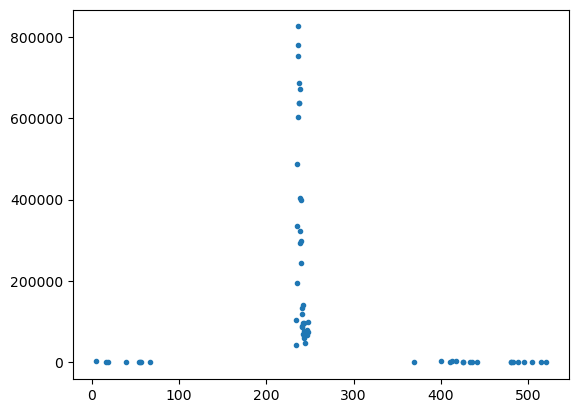

284 210.12033929364728


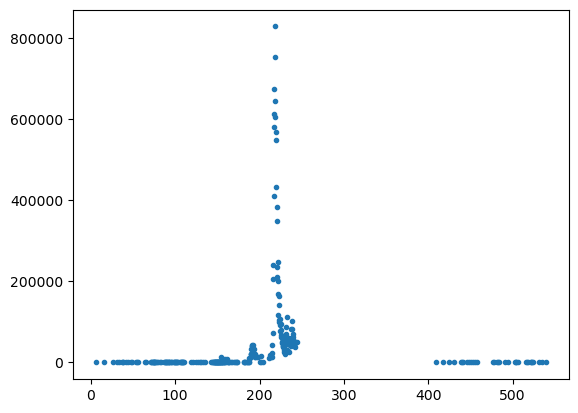

58 260.2005264005126


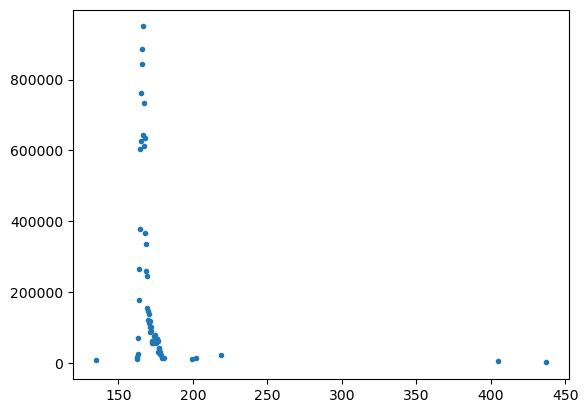

77 218.15134960247153


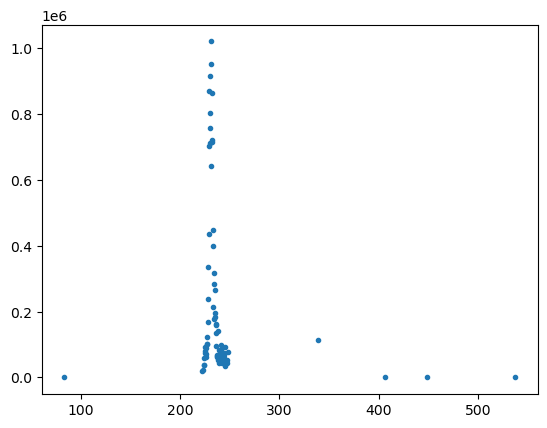

620 246.24135995214658


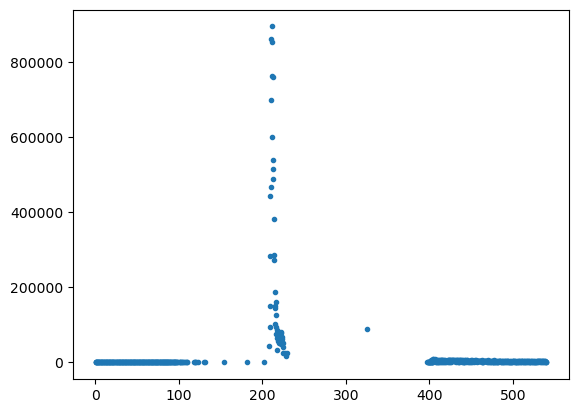

1082 283.28231564227616


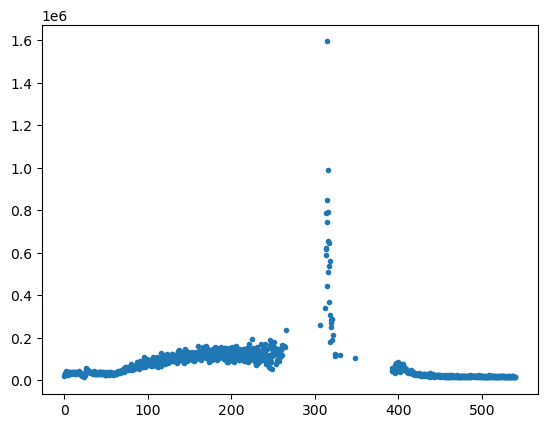

190 288.25299619726565


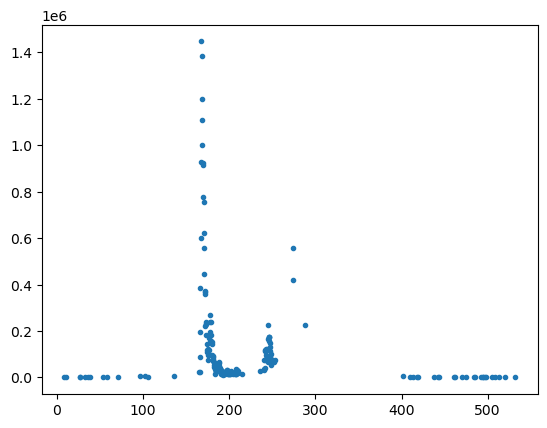

74 294.10839602721086


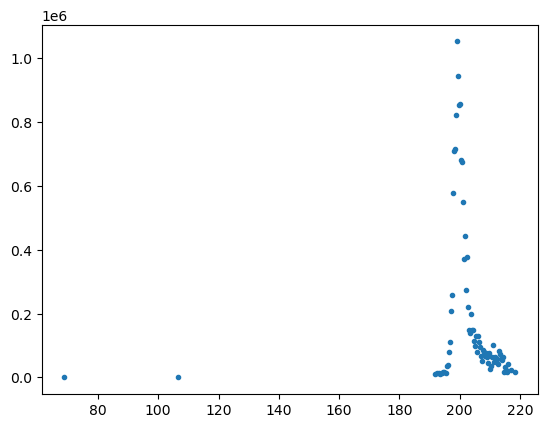

621 229.14092180485602


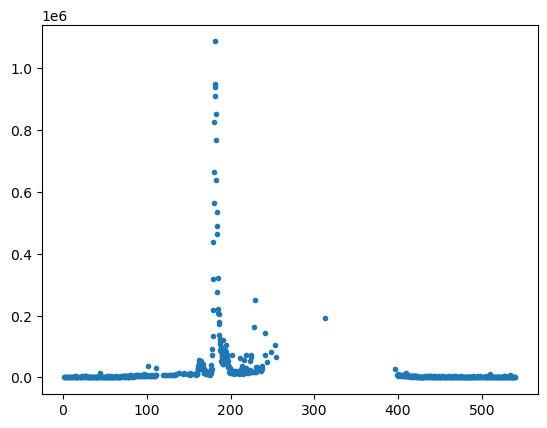

778 250.1169168903199


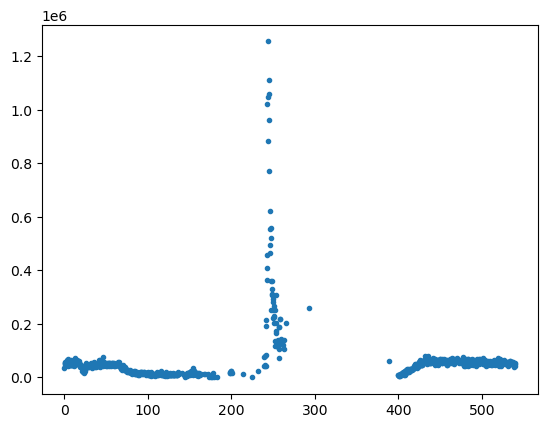

202 254.1747040384903


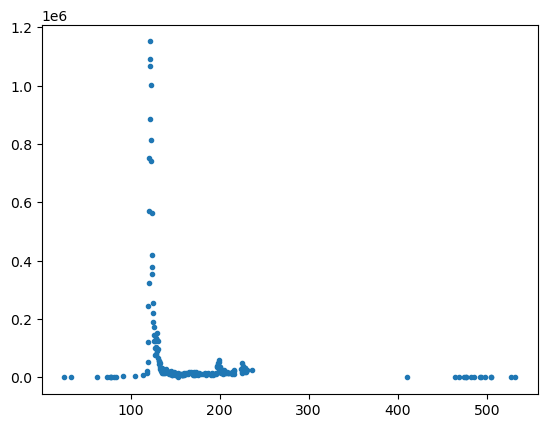

959 282.20371891382894


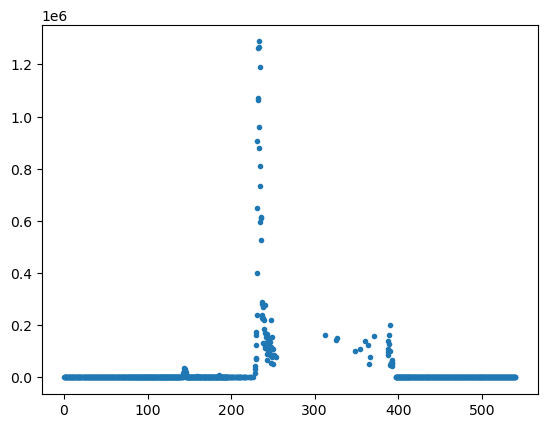

1236 237.07884561641188


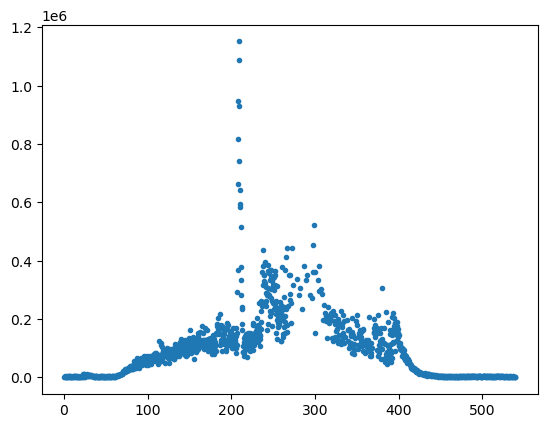

109 260.08727954030445


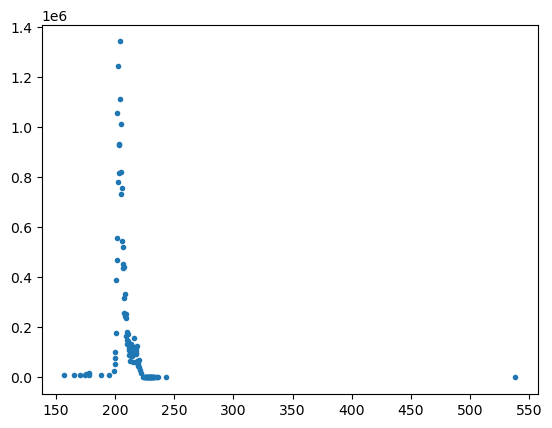

812 205.105054431721


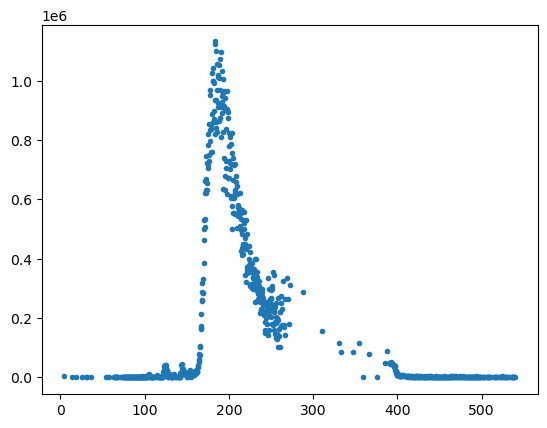

211 263.05580582278975


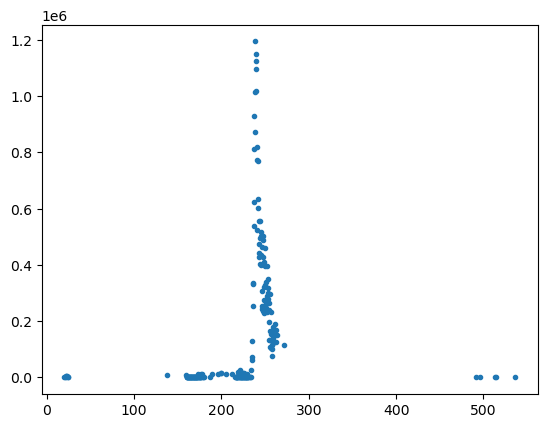

1057 217.104448828234


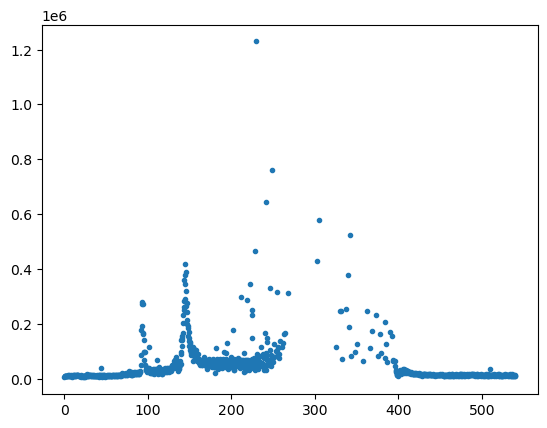

108 266.1722488623254


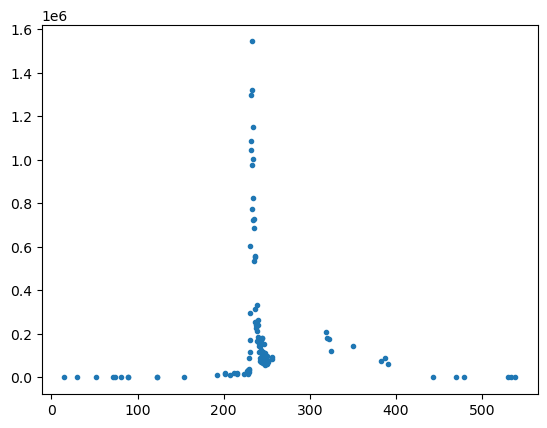

132 218.08093613879785


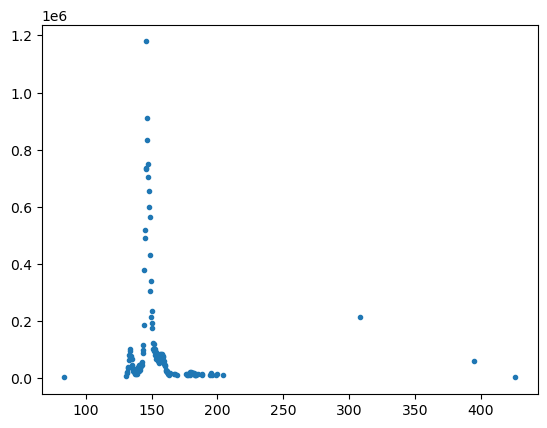

159 297.1591312023666


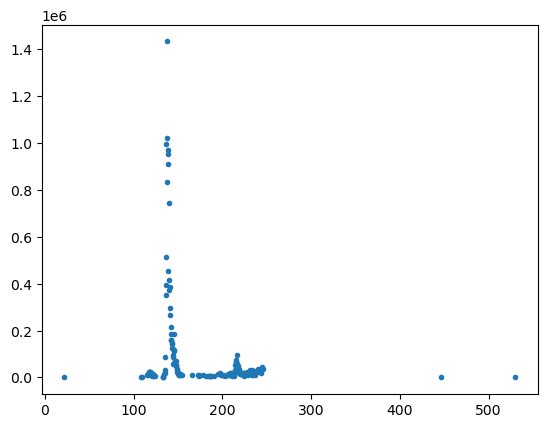

404 273.12659193593606


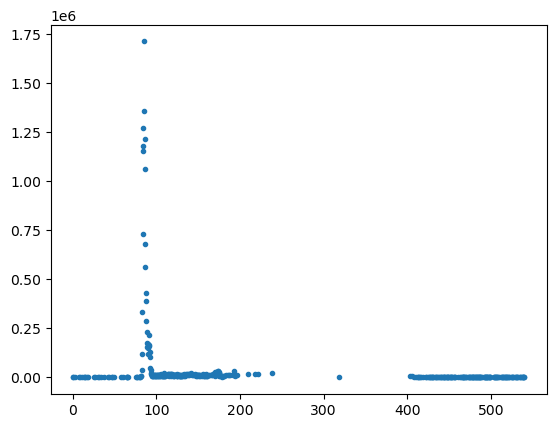

40 298.0205811482734


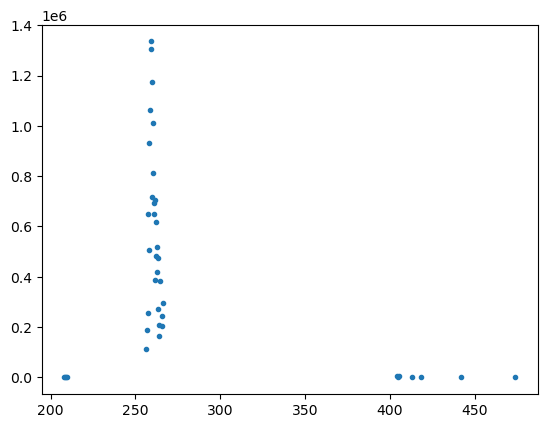

302 215.08124820710105


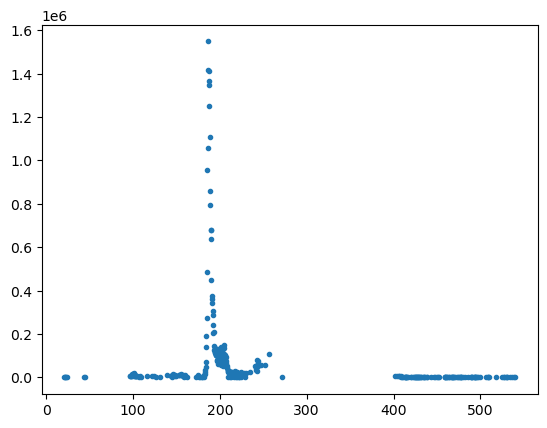

776 249.15684333433427


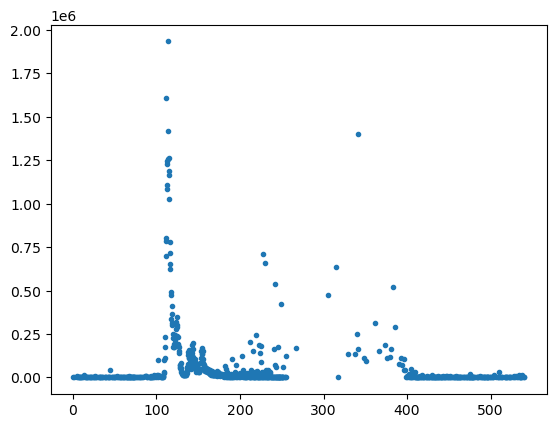

539 253.09694745534821


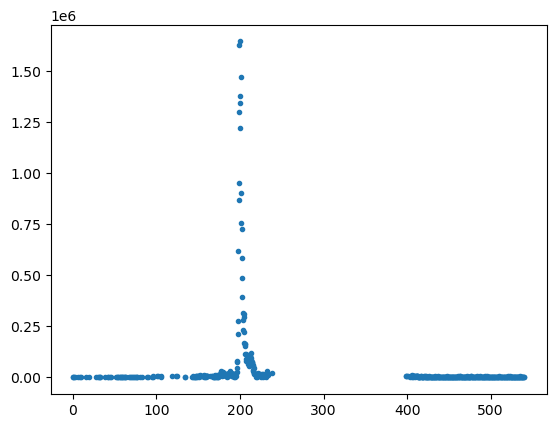

180 295.102032307018


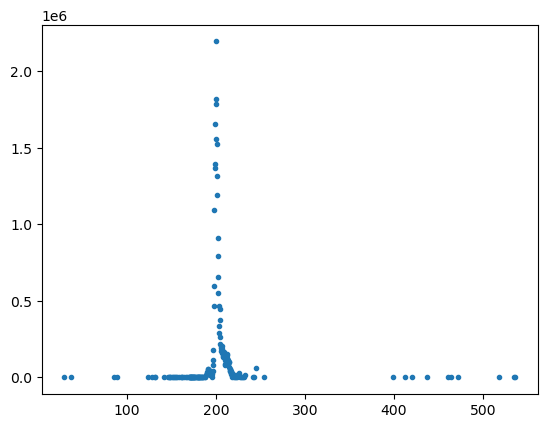

381 226.179854909456


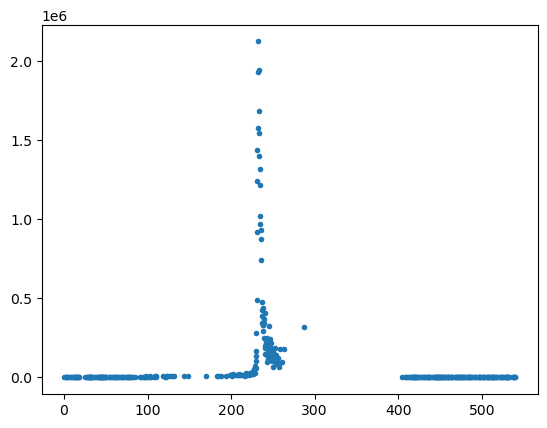

715 228.1953958725451


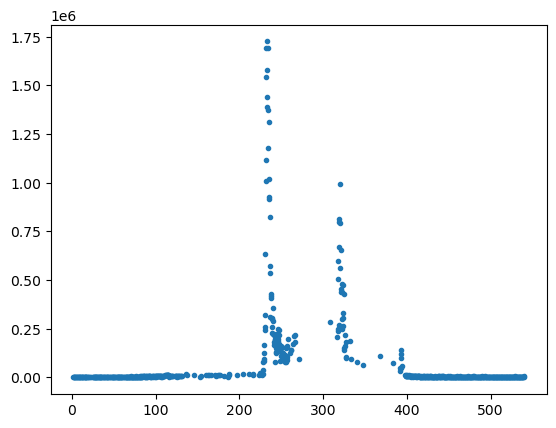

70 296.0236594855851


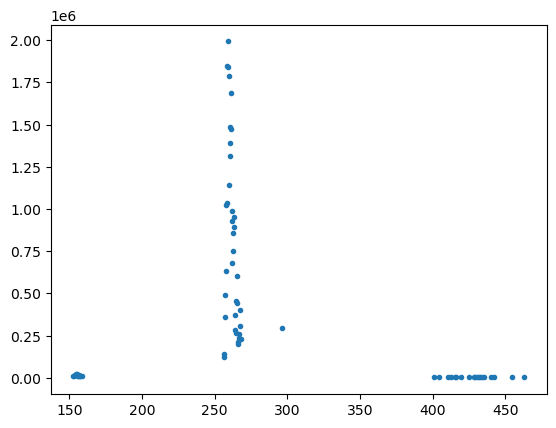

976 288.9623268704085


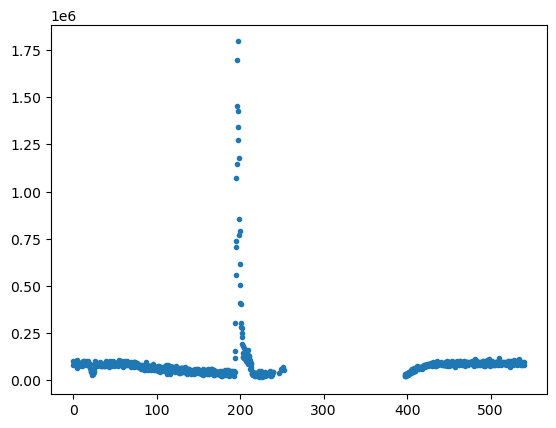

872 223.09520788002962


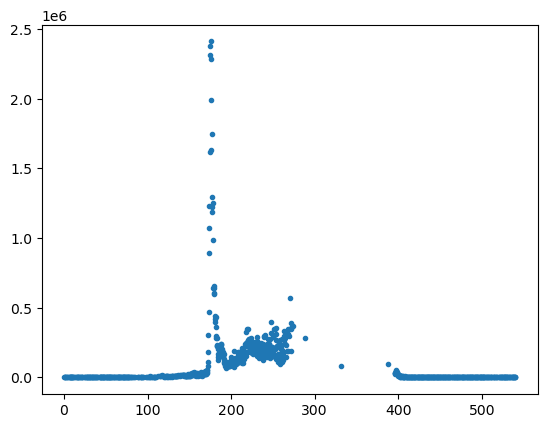

174 265.19904635987126


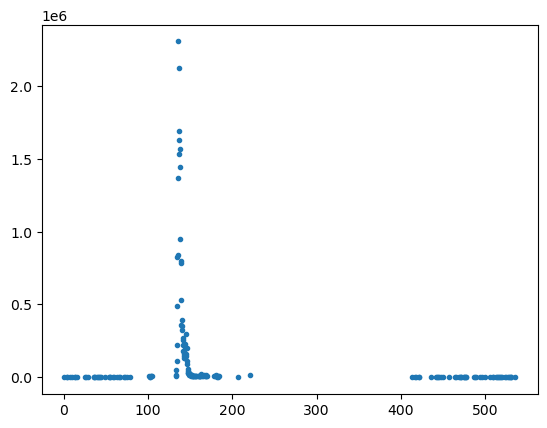

750 219.1125787932382


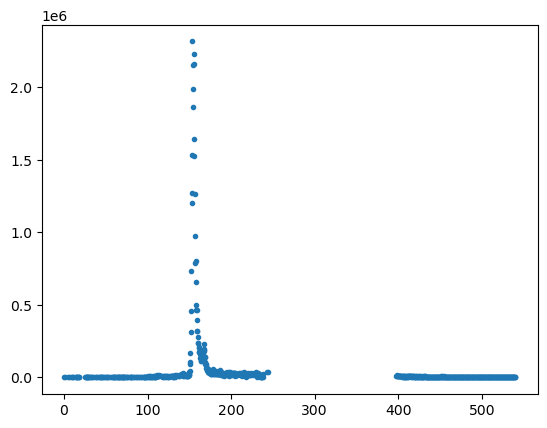

208 245.0780860206054


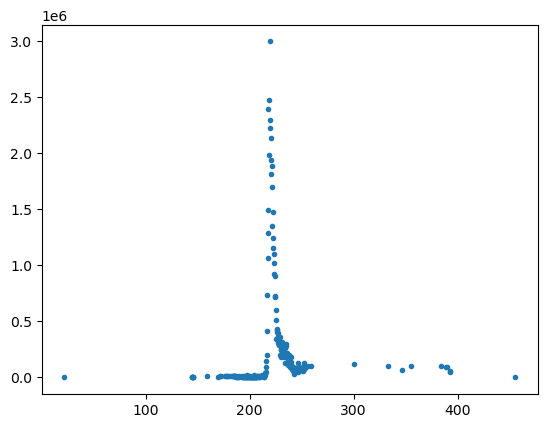

799 228.17852427693225


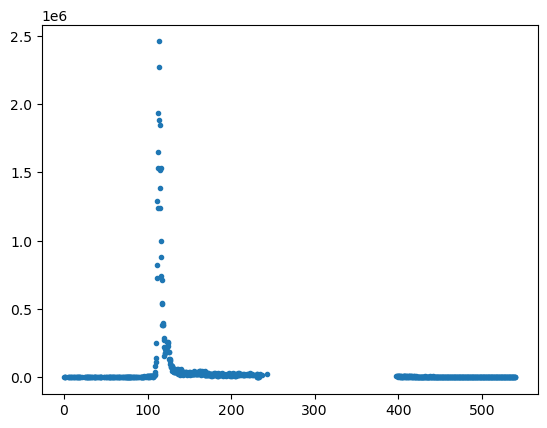

268 279.21448159148474


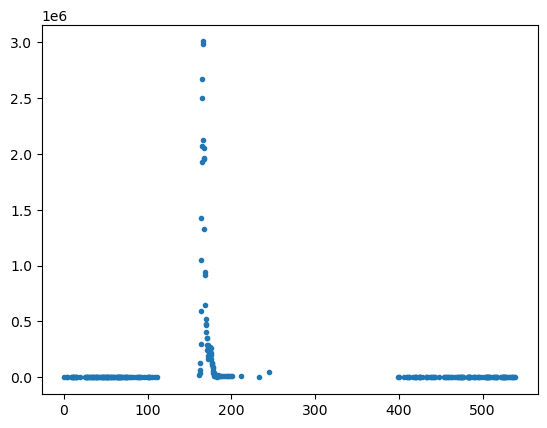

735 267.1702984562854


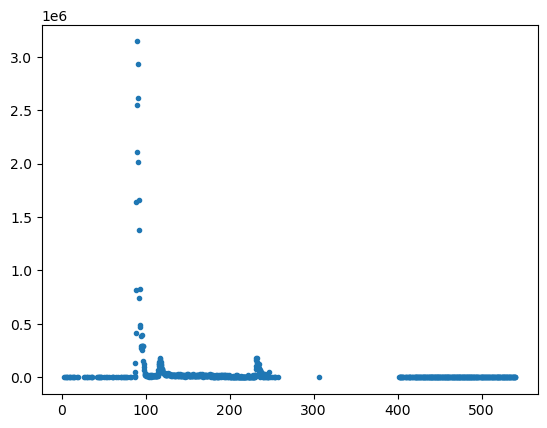

195 238.10550382865168


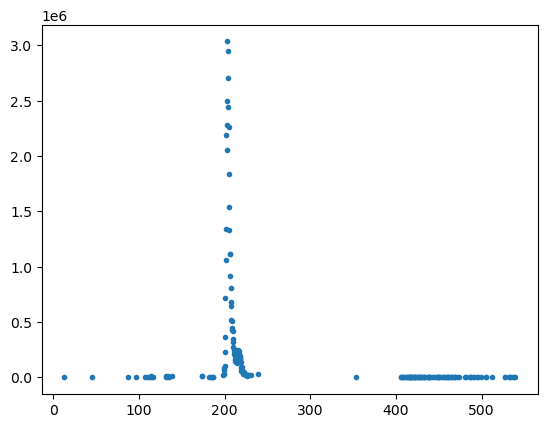

81 254.0589213458511


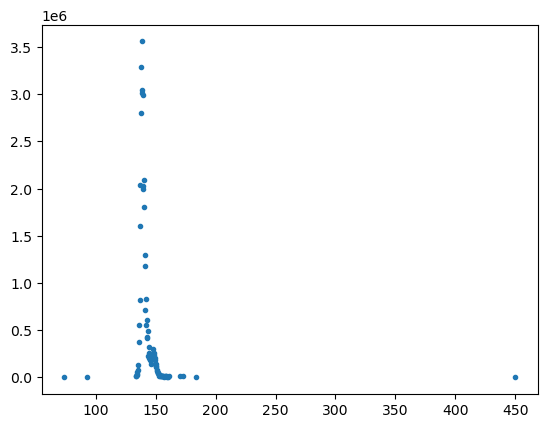

818 215.12517313331395


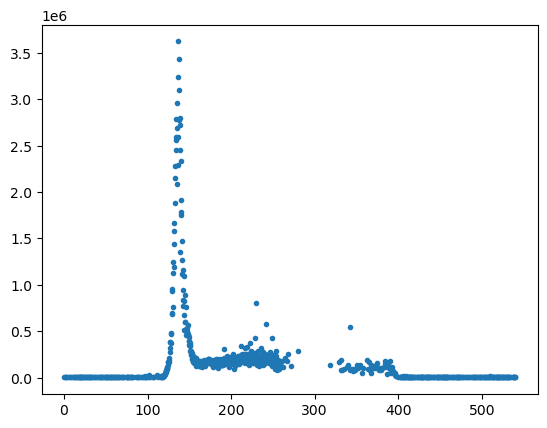

1077 277.17950264272747


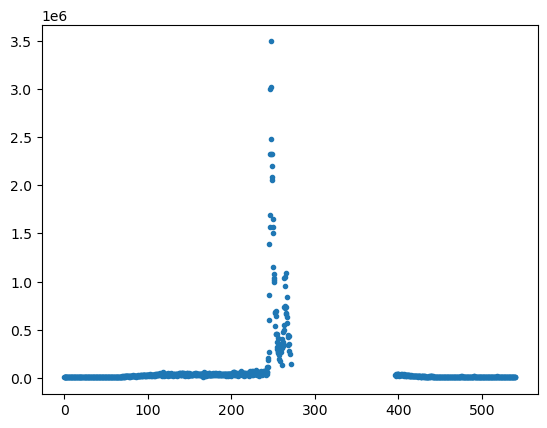

393 269.1938065656714


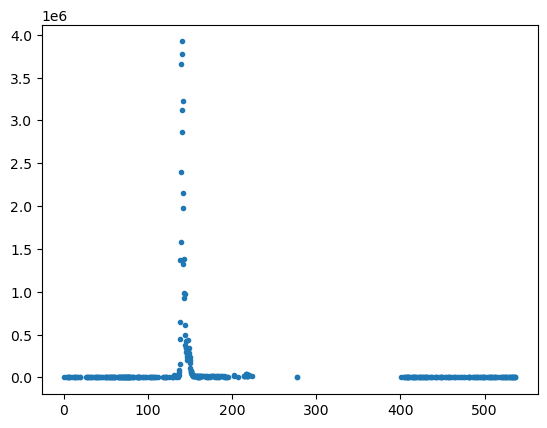

99 259.05757810950047


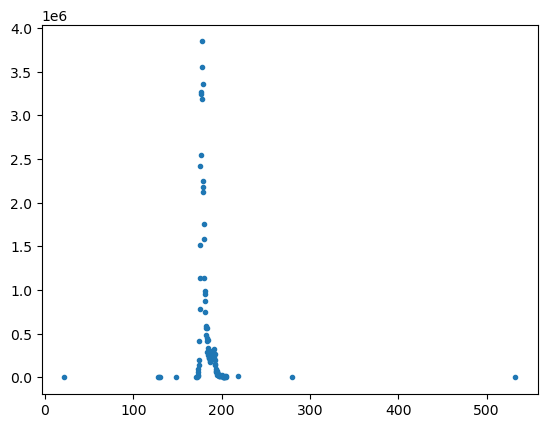

234 241.06775727716203


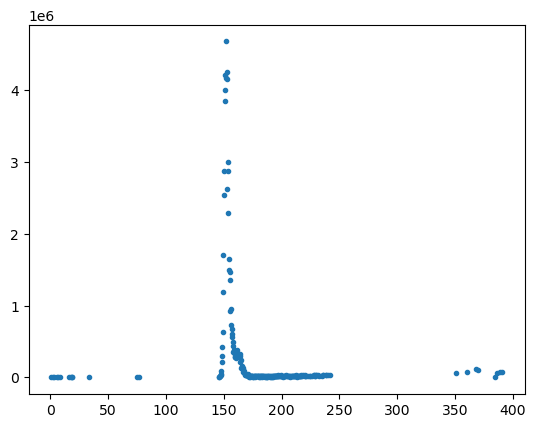

73 274.2737832256478


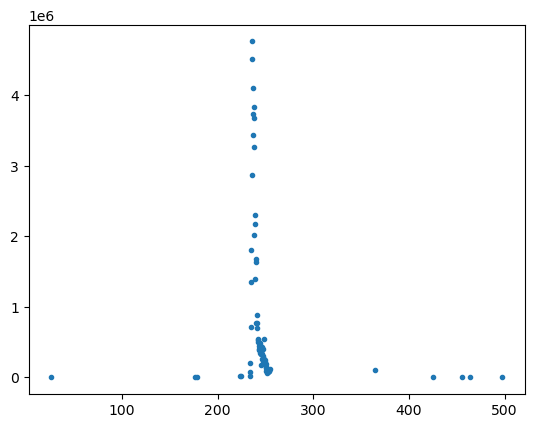

634 232.10795491474005


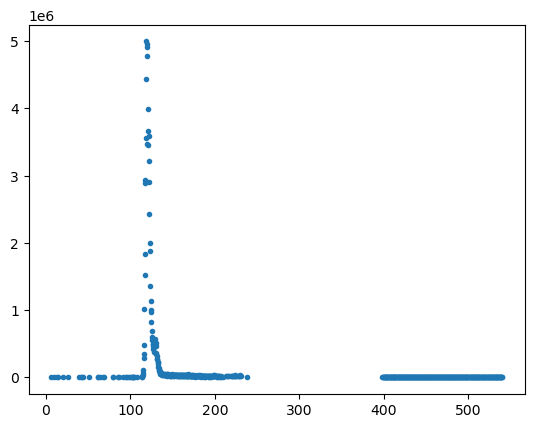

767 284.96131089187685


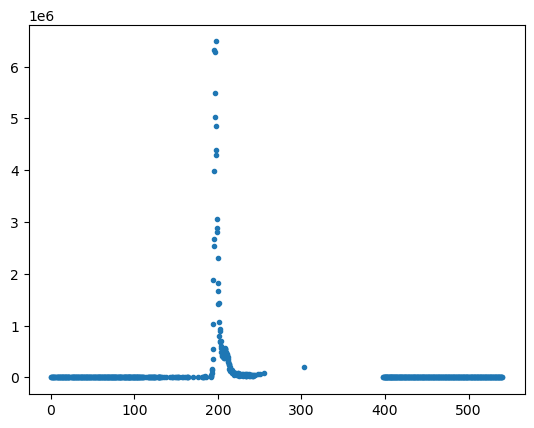

695 291.14541195440756


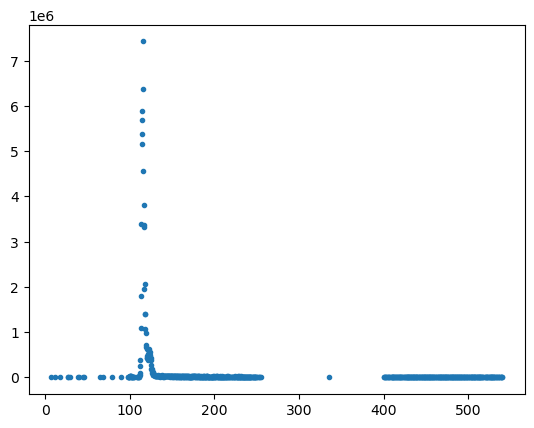

1029 209.11708669976153


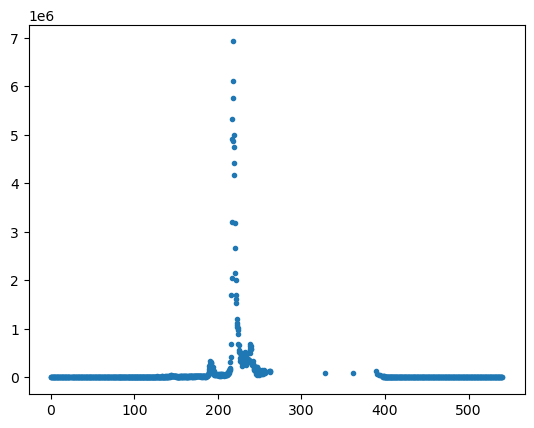

1002 286.9634598844256


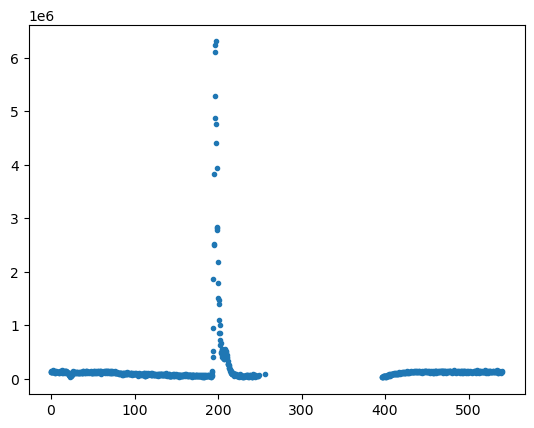

234 293.10473530499917


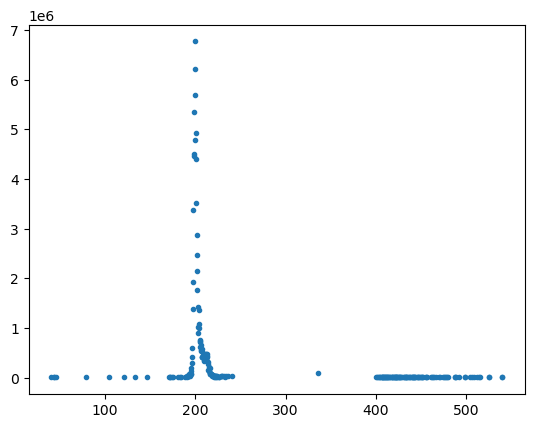

1335 282.2788351015226


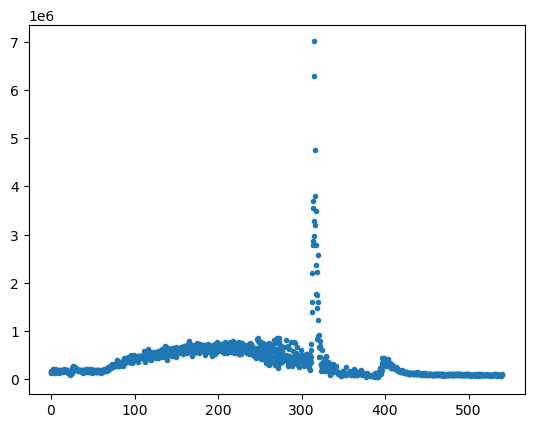

1173 226.95198079775952


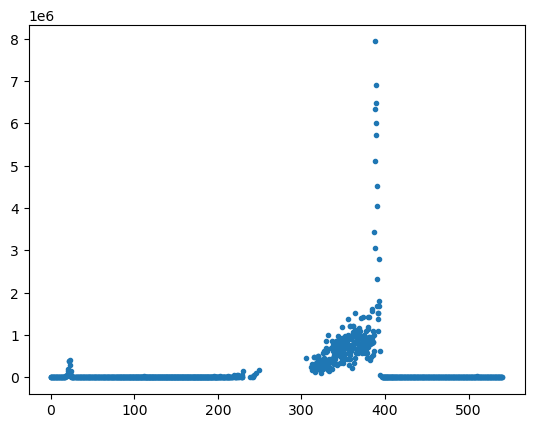

1001 214.08958046783434


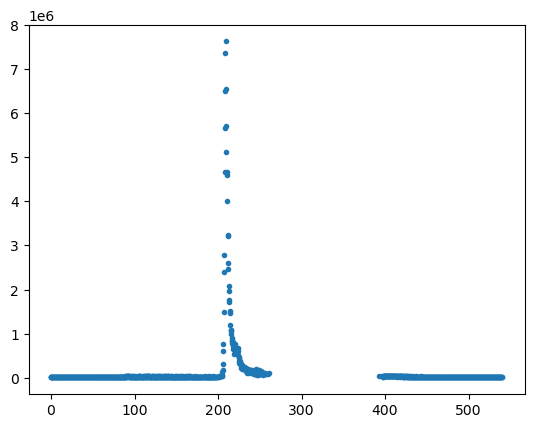

113 259.08391660388986


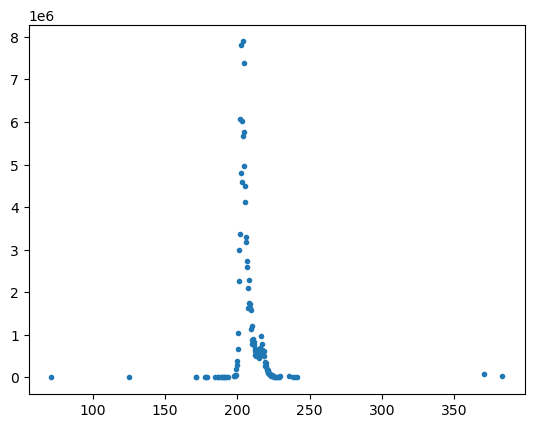

1111 204.10168355233253


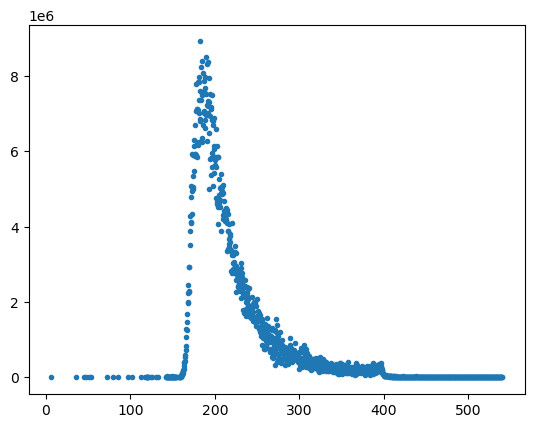

514 249.10936010555082


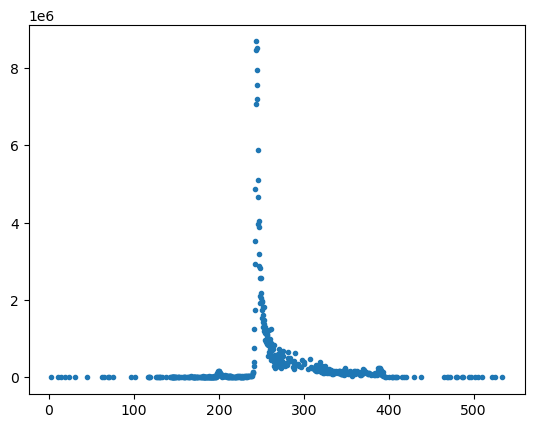

224 236.07168359188384


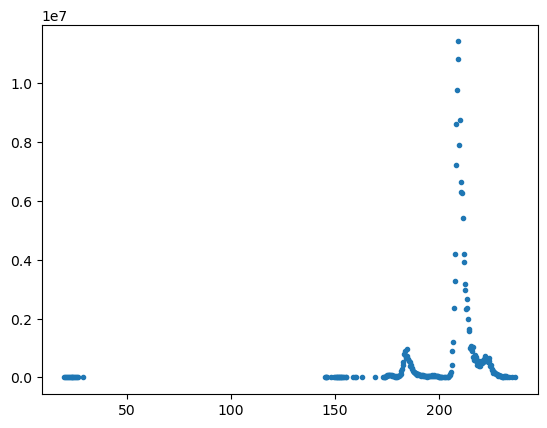

662 264.1955369554207


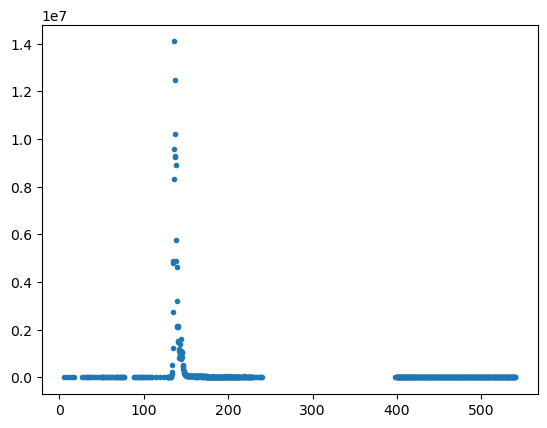

506 278.21113447138447


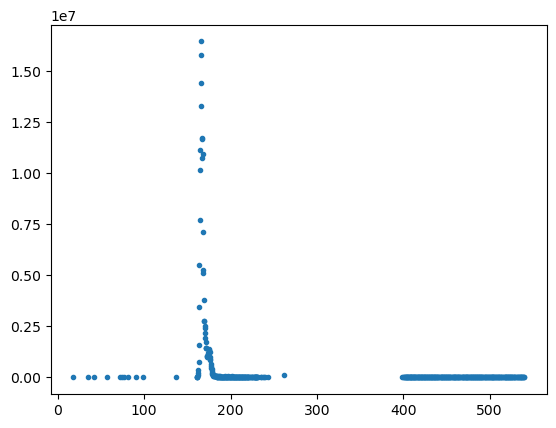

759 237.10233358661824


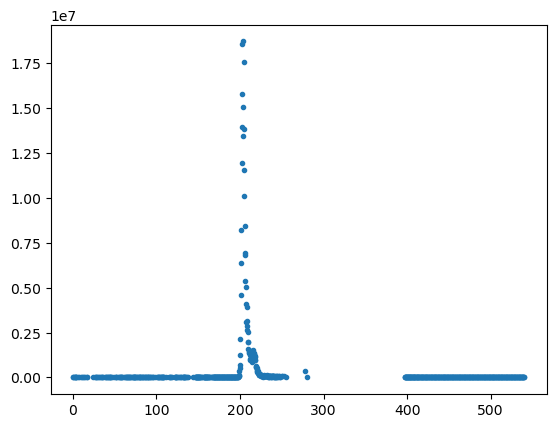

1042 227.17537090597293


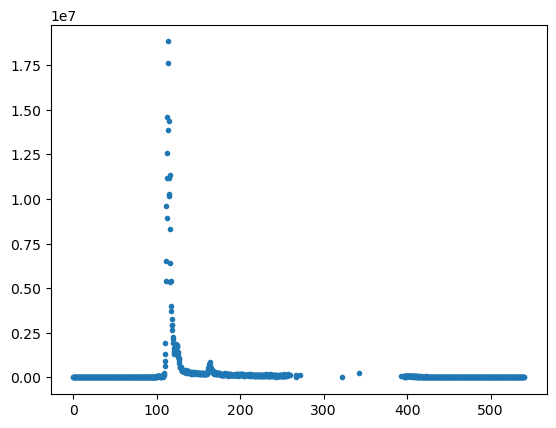

774 268.1903878716637


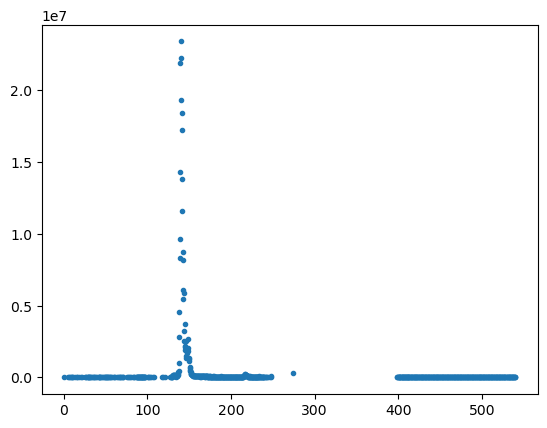

In [56]:
#def MaxRTChrom():
for peak_id in np.arange(len(SpectraPeaks)):
    maxIntVec=[]
    RTVec=[]
    peak=SpectraPeaks[peak_id,:]
    min_mz=peak[-2]
    max_mz=peak[-1]
    #plt.xlim([201.141,201.142])
    for spectrum_id in MS1IDVec:
        spectrum=DataSet[int(spectrum_id)]
        RawSpectrum=np.array(spectrum.get_peaks()).T
        LittleSpecFil=(RawSpectrum[:,0]>min_mz)&(RawSpectrum[:,0]<max_mz)
        LittleSpec=RawSpectrum[LittleSpecFil,:]
        if len(LittleSpec)>0:
            maxInt=np.max(LittleSpec[:,1])            
            RT=spectrum.getRT()
            maxIntVec.append(maxInt)
            RTVec.append(RT)
    IntVecFil=np.where(np.array(maxIntVec)>1e5)[0]    
    if len(IntVecFil)>20:
        print(len(RTVec),peak[0])
        plt.plot(RTVec,maxIntVec,'.')
        plt.show()
    #plt.plot(LittleSpec[:,0],LittleSpec[:,1],'k.',ms=1)
    #plt.show()